In [40]:

from statsmodels.regression.rolling import RollingOLS
#from alpha_vantage.timeseries import TimeSeries
#from nsepython import *
import time
import pandas_datareader.data as web
import matplotlib.pyplot as plt #plotting graphs from data
import statsmodels.api as sm
import pandas as pd #extracting and manipulating dataframes
import numpy as np #for using mathematical functions
import datetime as dt #used to convert string to datetime and creating time offset
import yfinance as yf #extracting data fields related to given stocks
import pandas_ta #calculating technical indicators
import warnings
warnings.filterwarnings('ignore')

#sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

In [41]:
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'COIN',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',

In [42]:
end_date = '2025-05-11'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*10)
start_date

Timestamp('2015-05-14 00:00:00')

In [43]:
df = yf.download(tickers=symbols_list, start=start_date, end=end_date, auto_adjust=False).stack()

[*********************100%***********************]  504 of 504 completed


In [44]:
df.index.names = ['date','ticker']
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-05-14 A        38.738277   42.049999   42.230000   41.869999   42.180000   
           AAPL     28.918394   32.237499   32.237499   31.790001   31.852501   
           ABBV     43.492126   65.970001   66.269997   64.940002   65.860001   
           ABT      40.245770   48.669998   48.790001   47.290001   47.380001   
           ACGL     20.111504   21.150000   21.176666   20.846666   20.959999   
...                       ...         ...         ...         ...         ...   
2025-05-09 XYL     122.849998  122.849998  124.000000  122.620003  123.559998   
           YUM     147.130005  147.130005  148.970001  146.490005  148.259995   
           ZBH      95.209999   95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  159.270004  162.440002  159.080002  161.410004   

Price                   volume  
date       ticker               
2015-05-14 A         2883700.0  
           AAPL    180814000.0  
           ABBV      5868900.0  
           ABT       8225900.0  
           ACGL      1300500.0  
...                        ...  
2025-05-09 XYL        664800.0  
           YUM       1068500.0  
           ZBH       3438600.0  
           ZBRA       700800.0  
           ZTS       4243100.0  

[1231466 rows x 6 columns]

In [45]:
df.groupby(level=1)['adj close'].transform(lambda x: print(pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2]))

date        ticker
2015-05-14  A              NaN
2015-05-15  A              NaN
2015-05-18  A              NaN
2015-05-19  A              NaN
2015-05-20  A              NaN
                        ...   
2025-05-05  A         4.713225
2025-05-06  A         4.713878
2025-05-07  A         4.713204
2025-05-08  A         4.715514
2025-05-09  A         4.713586
Name: BBU_20_2.0, Length: 2513, dtype: float64
date        ticker
2015-05-14  AAPL           NaN
2015-05-15  AAPL           NaN
2015-05-18  AAPL           NaN
2015-05-19  AAPL           NaN
2015-05-20  AAPL           NaN
                        ...   
2025-05-05  AAPL      5.407067
2025-05-06  AAPL      5.401827
2025-05-07  AAPL      5.379080
2025-05-08  AAPL      5.379145
2025-05-09  AAPL      5.376050
Name: BBU_20_2.0, Length: 2513, dtype: float64
date        ticker
2015-05-14  ABBV           NaN
2015-05-15  ABBV           NaN
2015-05-18  ABBV           NaN
2015-05-19  ABBV           NaN
2015-05-20  ABBV           NaN
            

date        ticker
2015-05-14  A        NaN
            AAPL     NaN
            ABBV     NaN
            ABT      NaN
            ACGL     NaN
                      ..
2025-05-09  XYL      NaN
            YUM      NaN
            ZBH      NaN
            ZBRA     NaN
            ZTS      NaN
Name: adj close, Length: 1231466, dtype: float64

In [46]:
#calculating garman_klass_volatility, rsi and bollinger bands
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close']) - np.log(df['open']))**2)
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x,length=20))
df['bb_low'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x),length=10).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x),length=10).iloc[:,1])
df['bb_up'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x),length=10).iloc[:,2])
df = df.dropna()
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-06-12 A        36.702343   39.840000   40.490002   39.740002   40.330002   
           AAPL     28.519215   31.792500   32.082500   31.777500   32.047501   
           ABBV     44.204132   67.050003   67.930000   66.589996   67.889999   
           ABT      40.245770   48.669998   48.959999   48.639999   48.910000   
           ACGL     20.808830   21.883333   21.916668   21.750000   21.799999   
...                       ...         ...         ...         ...         ...   
2025-05-09 XYL     122.849998  122.849998  124.000000  122.620003  123.559998   
           YUM     147.130005  147.130005  148.970001  146.490005  148.259995   
           ZBH      95.209999   95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-06-12 A         2769600.0         -0.003257  30.972836  3.624952   
           AAPL    147544800.0         -0.005210  40.309406  3.381217   
           ABBV      8249900.0         -0.070919  54.179348  3.802170   
           ABT       3692100.0         -0.014664  49.015175  3.708926   
           ACGL      1321800.0         -0.000807  64.565600  3.047753   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264323  4.765894   
           YUM       1068500.0          0.000118  48.007863  4.991401   
           ZBH       3438600.0          0.000270  39.772617  4.498250   
           ZBRA       700800.0          0.000104  52.322959  5.490057   
           ZTS       4243100.0          0.000150  52.741649  5.019413   

Price                bb_mid     bb_up  
date       ticker                      
2015-06-12 A       3.645523  3.666094  
           AAPL    3.397682  3.414147  
           ABBV    3.816501  3.830832  
           ABT     3.719574  3.730222  
           ACGL    3.067185  3.086616  
...                     ...       ...  
2025-05-09 XYL     4.803956  4.842017  
           YUM     5.005978  5.020555  
           ZBH     4.592992  4.687734  
           ZBRA    5.543398  5.596739  
           ZTS     5.058202  5.096992  

[1221359 rows x 11 columns]

In [47]:
#calculating atr
def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'],
                       low=stock_data['low'],
                       close=stock_data['close'],
                       length=14)
    #return after normalizing i.e. mean/std.deviation
    return atr.sub(atr.mean()).div(atr.std())
df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-06-12 A        36.702343   39.840000   40.490002   39.740002   40.330002   
           AAPL     28.519215   31.792500   32.082500   31.777500   32.047501   
           ABBV     44.204132   67.050003   67.930000   66.589996   67.889999   
           ABT      40.245770   48.669998   48.959999   48.639999   48.910000   
           ACGL     20.808830   21.883333   21.916668   21.750000   21.799999   
...                       ...         ...         ...         ...         ...   
2025-05-09 XYL     122.849998  122.849998  124.000000  122.620003  123.559998   
           YUM     147.130005  147.130005  148.970001  146.490005  148.259995   
           ZBH      95.209999   95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-06-12 A         2769600.0         -0.003257  30.972836  3.624952   
           AAPL    147544800.0         -0.005210  40.309406  3.381217   
           ABBV      8249900.0         -0.070919  54.179348  3.802170   
           ABT       3692100.0         -0.014664  49.015175  3.708926   
           ACGL      1321800.0         -0.000807  64.565600  3.047753   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264323  4.765894   
           YUM       1068500.0          0.000118  48.007863  4.991401   
           ZBH       3438600.0          0.000270  39.772617  4.498250   
           ZBRA       700800.0          0.000104  52.322959  5.490057   
           ZTS       4243100.0          0.000150  52.741649  5.019413   

Price                bb_mid     bb_up       atr  
date       ticker                                
2015-06-12 A       3.645523  3.666094       NaN  
           AAPL    3.397682  3.414147       NaN  
           ABBV    3.816501  3.830832       NaN  
           ABT     3.719574  3.730222       NaN  
           ACGL    3.067185  3.086616       NaN  
...                     ...       ...       ...  
2025-05-09 XYL     4.803956  4.842017  1.473591  
           YUM     5.005978  5.020555  2.058781  
           ZBH     4.592992  4.687734  0.527012  
           ZBRA    5.543398  5.596739  0.826982  
           ZTS     5.058202  5.096992  1.497029  

[1221359 rows x 12 columns]

In [48]:
#computing MACD indicator
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    #return after normalizing i.e. mean/std.deviation
    return ((macd - macd.mean()) / macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['adj close'].apply(compute_macd)
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-06-12 A        36.702343   39.840000   40.490002   39.740002   40.330002   
           AAPL     28.519215   31.792500   32.082500   31.777500   32.047501   
           ABBV     44.204132   67.050003   67.930000   66.589996   67.889999   
           ABT      40.245770   48.669998   48.959999   48.639999   48.910000   
           ACGL     20.808830   21.883333   21.916668   21.750000   21.799999   
...                       ...         ...         ...         ...         ...   
2025-05-09 XYL     122.849998  122.849998  124.000000  122.620003  123.559998   
           YUM     147.130005  147.130005  148.970001  146.490005  148.259995   
           ZBH      95.209999   95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-06-12 A         2769600.0         -0.003257  30.972836  3.624952   
           AAPL    147544800.0         -0.005210  40.309406  3.381217   
           ABBV      8249900.0         -0.070919  54.179348  3.802170   
           ABT       3692100.0         -0.014664  49.015175  3.708926   
           ACGL      1321800.0         -0.000807  64.565600  3.047753   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264323  4.765894   
           YUM       1068500.0          0.000118  48.007863  4.991401   
           ZBH       3438600.0          0.000270  39.772617  4.498250   
           ZBRA       700800.0          0.000104  52.322959  5.490057   
           ZTS       4243100.0          0.000150  52.741649  5.019413   

Price                bb_mid     bb_up       atr      macd  
date       ticker                                          
2015-06-12 A       3.645523  3.666094       NaN       NaN  
           AAPL    3.397682  3.414147       NaN       NaN  
           ABBV    3.816501  3.830832       NaN       NaN  
           ABT     3.719574  3.730222       NaN       NaN  
           ACGL    3.067185  3.086616       NaN       NaN  
...                     ...       ...       ...       ...  
2025-05-09 XYL     4.803956  4.842017  1.473591  1.056289  
           YUM     5.005978  5.020555  2.058781 -0.510510  
           ZBH     4.592992  4.687734  0.527012 -1.256693  
           ZBRA    5.543398  5.596739  0.826982 -0.027792  
           ZTS     5.058202  5.096992  1.497029  0.083414  

[1221359 rows x 13 columns]

In [50]:
df['dollar_volume'] = (df['adj close']*df['volume'])/1e6
df

Price               adj close       close        high         low        open  \
date       ticker                                                               
2015-06-12 A        36.702343   39.840000   40.490002   39.740002   40.330002   
           AAPL     28.519215   31.792500   32.082500   31.777500   32.047501   
           ABBV     44.204132   67.050003   67.930000   66.589996   67.889999   
           ABT      40.245770   48.669998   48.959999   48.639999   48.910000   
           ACGL     20.808830   21.883333   21.916668   21.750000   21.799999   
...                       ...         ...         ...         ...         ...   
2025-05-09 XYL     122.849998  122.849998  124.000000  122.620003  123.559998   
           YUM     147.130005  147.130005  148.970001  146.490005  148.259995   
           ZBH      95.209999   95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       ticker                                                       
2015-06-12 A         2769600.0         -0.003257  30.972836  3.624952   
           AAPL    147544800.0         -0.005210  40.309406  3.381217   
           ABBV      8249900.0         -0.070919  54.179348  3.802170   
           ABT       3692100.0         -0.014664  49.015175  3.708926   
           ACGL      1321800.0         -0.000807  64.565600  3.047753   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264323  4.765894   
           YUM       1068500.0          0.000118  48.007863  4.991401   
           ZBH       3438600.0          0.000270  39.772617  4.498250   
           ZBRA       700800.0          0.000104  52.322959  5.490057   
           ZTS       4243100.0          0.000150  52.741649  5.019413   

Price                bb_mid     bb_up       atr      macd  dollar_volume  
date       ticker                                                         
2015-06-12 A       3.645523  3.666094       NaN       NaN     101.650809  
           AAPL    3.397682  3.414147       NaN       NaN    4207.861819  
           ABBV    3.816501  3.830832       NaN       NaN     364.679669  
           ABT     3.719574  3.730222       NaN       NaN     148.591406  
           ACGL    3.067185  3.086616       NaN       NaN      27.505112  
...                     ...       ...       ...       ...            ...  
2025-05-09 XYL     4.803956  4.842017  1.473591  1.056289      81.670679  
           YUM     5.005978  5.020555  2.058781 -0.510510     157.208410  
           ZBH     4.592992  4.687734  0.527012 -1.256693     327.389103  
           ZBRA    5.543398  5.596739  0.826982 -0.027792     186.910362  
           ZTS     5.058202  5.096992  1.497029  0.083414     675.798555  

[1221359 rows x 14 columns]

In [51]:
#aggregate to monthly level to reduce training time
#we convert the business daily data to month end frequency
last_cols = [c for c in df.columns.unique(0) if c not in ['dollar_volume', 'volume', 'open', 'high', 'low', 'close']]
data = pd.concat([
    df.unstack('ticker')['dollar_volume'].resample('M').mean().stack('ticker').to_frame('dollar_volume'),
    df.unstack()[last_cols].resample('M').last().stack('ticker')
],axis=1).dropna()
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-07-31 A           90.737258   37.819336         -0.002557  55.359141   
           AAPL      5408.184272   27.202797         -0.005398  39.341711   
           ABBV       379.276591   46.498112         -0.066325  55.197633   
           ABT        224.037800   42.118568         -0.014291  57.215691   
           ACGL        33.666703   22.618706         -0.001295  66.570176   
...                          ...         ...               ...        ...   
2025-05-31 XYL        174.264747  122.849998          0.000050  57.264323   
           YUM        275.349401  147.130005          0.000118  48.007863   
           ZBH        336.696688   95.209999          0.000270  39.772617   
           ZBRA       155.187785  266.709991          0.000104  52.322959   
           ZTS        603.422328  159.270004          0.000150  52.741649   

                     bb_low    bb_mid     bb_up       atr      macd  
date       ticker                                                    
2015-07-31 A       3.614774  3.640589  3.666404 -1.299730  0.041205  
           AAPL    3.316695  3.368474  3.420253 -1.020809 -0.312696  
           ABBV    3.839149  3.863285  3.887421 -0.993331  0.021558  
           ABT     3.747481  3.764496  3.781510 -1.174990  0.135726  
           ACGL    3.129406  3.148956  3.168506 -1.058964  0.162959  
...                     ...       ...       ...       ...       ...  
2025-05-31 XYL     4.765894  4.803956  4.842017  1.473591  1.056289  
           YUM     4.991401  5.005978  5.020555  2.058781 -0.510510  
           ZBH     4.498250  4.592992  4.687734  0.527012 -1.256693  
           ZBRA    5.490057  5.543398  5.596739  0.826982 -0.027792  
           ZTS     5.019413  5.058202  5.096992  1.497029  0.083414  

[58299 rows x 9 columns]

In [52]:
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-07-31 A           90.737258   37.819336         -0.002557  55.359141   
           AAPL      5408.184272   27.202797         -0.005398  39.341711   
           ABBV       379.276591   46.498112         -0.066325  55.197633   
           ABT        224.037800   42.118568         -0.014291  57.215691   
           ACGL        33.666703   22.618706         -0.001295  66.570176   
...                          ...         ...               ...        ...   
2025-05-31 XYL        174.264747  122.849998          0.000050  57.264323   
           YUM        275.349401  147.130005          0.000118  48.007863   
           ZBH        336.696688   95.209999          0.000270  39.772617   
           ZBRA       155.187785  266.709991          0.000104  52.322959   
           ZTS        603.422328  159.270004          0.000150  52.741649   

                     bb_low    bb_mid     bb_up       atr      macd  
date       ticker                                                    
2015-07-31 A       3.614774  3.640589  3.666404 -1.299730  0.041205  
           AAPL    3.316695  3.368474  3.420253 -1.020809 -0.312696  
           ABBV    3.839149  3.863285  3.887421 -0.993331  0.021558  
           ABT     3.747481  3.764496  3.781510 -1.174990  0.135726  
           ACGL    3.129406  3.148956  3.168506 -1.058964  0.162959  
...                     ...       ...       ...       ...       ...  
2025-05-31 XYL     4.765894  4.803956  4.842017  1.473591  1.056289  
           YUM     4.991401  5.005978  5.020555  2.058781 -0.510510  
           ZBH     4.498250  4.592992  4.687734  0.527012 -1.256693  
           ZBRA    5.490057  5.543398  5.596739  0.826982 -0.027792  
           ZTS     5.019413  5.058202  5.096992  1.497029  0.083414  

[58299 rows x 9 columns]

In [53]:
#calculate the 5year rollong avg dollar vol. for each stocks before filtering
data['dollar_volume'] = (data.loc[:,'dollar_volume'].unstack('ticker').rolling(5*12, min_periods=12).mean().stack())
#ranking the stocks in descending order on dollar vol.
data['dollar_volume_rank'] = (data.groupby('date')['dollar_volume'].rank(ascending=False))
data

dollar_volume   adj close  garman_klass_vol        rsi  \
date       ticker                                                           
2015-07-31 A                 NaN   37.819336         -0.002557  55.359141   
           AAPL              NaN   27.202797         -0.005398  39.341711   
           ABBV              NaN   46.498112         -0.066325  55.197633   
           ABT               NaN   42.118568         -0.014291  57.215691   
           ACGL              NaN   22.618706         -0.001295  66.570176   
...                          ...         ...               ...        ...   
2025-05-31 XYL        130.278601  122.849998          0.000050  57.264323   
           YUM        210.010325  147.130005          0.000118  48.007863   
           ZBH        181.392503   95.209999          0.000270  39.772617   
           ZBRA       131.153677  266.709991          0.000104  52.322959   
           ZTS        359.555835  159.270004          0.000150  52.741649   

                     bb_low    bb_mid     bb_up       atr      macd  \
date       ticker                                                     
2015-07-31 A       3.614774  3.640589  3.666404 -1.299730  0.041205   
           AAPL    3.316695  3.368474  3.420253 -1.020809 -0.312696   
           ABBV    3.839149  3.863285  3.887421 -0.993331  0.021558   
           ABT     3.747481  3.764496  3.781510 -1.174990  0.135726   
           ACGL    3.129406  3.148956  3.168506 -1.058964  0.162959   
...                     ...       ...       ...       ...       ...   
2025-05-31 XYL     4.765894  4.803956  4.842017  1.473591  1.056289   
           YUM     4.991401  5.005978  5.020555  2.058781 -0.510510   
           ZBH     4.498250  4.592992  4.687734  0.527012 -1.256693   
           ZBRA    5.490057  5.543398  5.596739  0.826982 -0.027792   
           ZTS     5.019413  5.058202  5.096992  1.497029  0.083414   

                   dollar_volume_rank  
date       ticker                      
2015-07-31 A                      NaN  
           AAPL                   NaN  
           ABBV                   NaN  
           ABT                    NaN  
           ACGL                   NaN  
...                               ...  
2025-05-31 XYL                  392.0  
           YUM                  274.0  
           ZBH                  307.0  
           ZBRA                 389.0  
           ZTS                  150.0  

[58299 rows x 10 columns]

In [54]:
#taking top 150 assets and we dont need dollar vol and dollar vol rank anymore
data = data[data['dollar_volume_rank']<150].drop(['dollar_volume','dollar_volume_rank'], axis=1)
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2016-06-30 AAPL     21.878302         -0.002122  46.690310  3.095733   
           ABBV     42.336662         -0.055119  53.759180  3.714336   
           ABT      33.261833         -0.008527  53.364841  3.463039   
           ACN      98.156593         -0.006961  44.144464  4.543857   
           ADBE     95.790001          0.000096  49.729128  4.509539   
...                       ...               ...        ...       ...   
2025-05-31 VZ       43.610001          0.000081  52.307663  3.773200   
           WDAY    259.179993          0.000097  61.190109  5.474717   
           WFC      72.449997          0.000104  56.308452  4.251586   
           WMT      96.720001          0.000044  56.550796  4.563099   
           XOM     107.309998          0.000081  49.286688  4.643471   

                     bb_mid     bb_up       atr      macd  
date       ticker                                          
2016-06-30 AAPL    3.121085  3.146438 -1.091846 -0.319262  
           ABBV    3.744848  3.775359 -0.960670 -0.274992  
           ABT     3.504848  3.546658 -1.132076 -0.310508  
           ACN     4.611257  4.678658 -0.960304 -0.420210  
           ADBE    4.563155  4.616770 -1.260127 -0.193586  
...                     ...       ...       ...       ...  
2025-05-31 VZ      3.795964  3.818728  0.583856  0.284683  
           WDAY    5.520149  5.565581  0.829654  1.091822  
           WFC     4.290094  4.328602  2.874177  1.383547  
           WMT     4.588362  4.613624  3.468013  2.834999  
           XOM     4.673260  4.703048  1.681687 -0.892449  

[16092 rows x 8 columns]

In [55]:
#calculating returns for different timeframes to capture timeseries dynamics to capture momentum patterns
def calculate_returns(df):
    outlier_cutoff = 0.005
    lags = [1,2,3,6,9,12]
    for lag in lags:
       df[f'return_{lag}m'] = (
           df['adj close']
           .pct_change(lag)
           .pipe(lambda x : x.clip(lower=x.quantile(outlier_cutoff),
                                  upper=x.quantile(1-outlier_cutoff)))
           .add(1)
           .pow(1/lag)
           .sub(1))
    return df

data = data.groupby(level=1, group_keys=False).apply(calculate_returns).dropna()
data

adj close  garman_klass_vol        rsi    bb_low  \
date       ticker                                                      
2017-06-30 AAPL     33.590496         -0.001991  43.606640  3.538371   
           ABBV     51.498554         -0.045411  71.505807  3.939205   
           ABT      42.172791         -0.008142  67.057179  3.759735   
           ACN     109.396683         -0.005478  49.971702  4.674657   
           ADBE    141.440002          0.000103  54.196896  4.944981   
...                       ...               ...        ...       ...   
2025-05-31 VZ       43.610001          0.000081  52.307663  3.773200   
           WDAY    259.179993          0.000097  61.190109  5.474717   
           WFC      72.449997          0.000104  56.308452  4.251586   
           WMT      96.720001          0.000044  56.550796  4.563099   
           XOM     107.309998          0.000081  49.286688  4.643471   

                     bb_mid     bb_up       atr      macd  return_1m  \
date       ticker                                                      
2017-06-30 AAPL    3.551623  3.564874 -0.979051 -0.388546  -0.057214   
           ABBV    3.957573  3.975941 -1.395935  0.357368   0.098304   
           ABT     3.768971  3.778206 -1.294777  0.466571   0.064608   
           ACN     4.707440  4.740224 -1.066685 -0.169384  -0.006347   
           ADBE    4.968763  4.992545 -1.113478  0.038591  -0.002961   
...                     ...       ...       ...       ...        ...   
2025-05-31 VZ      3.795964  3.818728  0.583856  0.284683  -0.010213   
           WDAY    5.520149  5.565581  0.829654  1.091822   0.057878   
           WFC     4.290094  4.328602  2.874177  1.383547   0.025876   
           WMT     4.588362  4.613624  3.468013  2.834999  -0.003045   
           XOM     4.673260  4.703048  1.681687 -0.892449   0.015905   

                   return_2m  return_3m  return_6m  return_9m  return_12m  
date       ticker                                                          
2017-06-30 AAPL     0.003351   0.002210   0.038447   0.028817    0.036375  
           ABBV     0.048635   0.039694   0.028152   0.018910    0.016459  
           ABT      0.055408   0.032677   0.042208   0.017728    0.019977  
           ACN      0.009763   0.013939   0.010848   0.003668    0.009076  
           ADBE     0.028384   0.028170   0.054365   0.029854    0.033010  
...                      ...        ...        ...        ...         ...  
2025-05-31 VZ      -0.011637   0.009275   0.002820   0.010259    0.010327  
           WDAY     0.053488  -0.005294   0.006035  -0.001704    0.017106  
           WFC      0.007338  -0.023856  -0.006591   0.025945    0.017963  
           WMT      0.050897  -0.004721   0.008701   0.026159    0.033553  
           XOM     -0.050108  -0.012184  -0.014185  -0.008559   -0.005283  

[13755 rows x 14 columns]

In [56]:
#downloading fama french factors and calculate rolling factors betas
factor_data = web.DataReader('F-F_Research_Data_5_Factors_2x3',
                            'famafrench',
                            start='2015')[0].drop('RF',axis=1)
factor_data.index = factor_data.index.to_timestamp()
factor_data = factor_data.resample('M').last().div(100)
factor_data.index.name = 'date'

factor_data

Mkt-RF     SMB     HML     RMW     CMA
date                                              
2015-01-31 -0.0311 -0.0092 -0.0359  0.0161 -0.0165
2015-02-28  0.0613  0.0032 -0.0186 -0.0112 -0.0182
2015-03-31 -0.0112  0.0307 -0.0038  0.0009 -0.0052
2015-04-30  0.0059 -0.0309  0.0182  0.0006 -0.0061
2015-05-31  0.0136  0.0084 -0.0115 -0.0180 -0.0075
...            ...     ...     ...     ...     ...
2024-08-31  0.0161 -0.0365 -0.0113  0.0085  0.0086
2024-09-30  0.0174 -0.0102 -0.0259  0.0004 -0.0026
2024-10-31 -0.0097 -0.0088  0.0089 -0.0138  0.0103
2024-11-30  0.0651  0.0478 -0.0005 -0.0262 -0.0217
2024-12-31 -0.0317 -0.0387 -0.0295  0.0182 -0.0110

[120 rows x 5 columns]

In [57]:
factor_data=factor_data.join(data['return_1m']).sort_index()
factor_data

Mkt-RF     SMB     HML     RMW    CMA  return_1m
date       ticker                                                  
2017-06-30 AAPL    0.0078  0.0258  0.0148 -0.0222  0.000  -0.057214
           ABBV    0.0078  0.0258  0.0148 -0.0222  0.000   0.098304
           ABT     0.0078  0.0258  0.0148 -0.0222  0.000   0.064608
           ACN     0.0078  0.0258  0.0148 -0.0222  0.000  -0.006347
           ADBE    0.0078  0.0258  0.0148 -0.0222  0.000  -0.002961
...                   ...     ...     ...     ...    ...        ...
2024-12-31 VZ     -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.098106
           WDAY   -0.0317 -0.0387 -0.0295  0.0182 -0.011   0.032161
           WFC    -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.077852
           WMT    -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.021079
           XOM    -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.088081

[13054 rows x 6 columns]

In [58]:
factor_data.xs('AAPL', level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date                                                         
2017-06-30  0.0078  0.0258  0.0148 -0.0222  0.0000  -0.057214
2017-07-31  0.0187 -0.0169 -0.0031 -0.0067 -0.0020   0.032704
2017-08-31  0.0016 -0.0183 -0.0210  0.0015 -0.0238   0.106999
2017-09-30  0.0251  0.0477  0.0312 -0.0150  0.0171  -0.060244
2017-10-31  0.0225 -0.0194  0.0019  0.0091 -0.0326   0.096808

In [59]:
factor_data.xs('MSFT', level=1).head()

Mkt-RF     SMB     HML     RMW     CMA  return_1m
date                                                         
2017-06-30  0.0078  0.0258  0.0148 -0.0222  0.0000  -0.013030
2017-07-31  0.0187 -0.0169 -0.0031 -0.0067 -0.0020   0.054693
2017-08-31  0.0016 -0.0183 -0.0210  0.0015 -0.0238   0.033953
2017-09-30  0.0251  0.0477  0.0312 -0.0150  0.0171  -0.003745
2017-10-31  0.0225 -0.0194  0.0019  0.0091 -0.0326   0.116660

In [60]:
# filter out stocks with less than 10 months of data
observations = factor_data.groupby(level=1).size()
valid_stocks = observations[observations >= 10]
valid_stocks

ticker
AAPL    91
ABBV    91
ABNB    24
ABT     91
ACN     91
        ..
WFC     91
WMT     91
WYNN    73
XOM     91
YUM     15
Length: 178, dtype: int64

In [61]:
factor_data = factor_data[factor_data.index.get_level_values('ticker').isin(valid_stocks.index)]
factor_data

Mkt-RF     SMB     HML     RMW    CMA  return_1m
date       ticker                                                  
2017-06-30 AAPL    0.0078  0.0258  0.0148 -0.0222  0.000  -0.057214
           ABBV    0.0078  0.0258  0.0148 -0.0222  0.000   0.098304
           ABT     0.0078  0.0258  0.0148 -0.0222  0.000   0.064608
           ACN     0.0078  0.0258  0.0148 -0.0222  0.000  -0.006347
           ADBE    0.0078  0.0258  0.0148 -0.0222  0.000  -0.002961
...                   ...     ...     ...     ...    ...        ...
2024-12-31 VZ     -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.098106
           WDAY   -0.0317 -0.0387 -0.0295  0.0182 -0.011   0.032161
           WFC    -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.077852
           WMT    -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.021079
           XOM    -0.0317 -0.0387 -0.0295  0.0182 -0.011  -0.088081

[13027 rows x 6 columns]

In [62]:
#calculating rolling factor betas
betas = (factor_data.groupby(
            level=1,
            group_keys=False)
        .apply(lambda x : RollingOLS(
            endog=x['return_1m'],
            exog=sm.add_constant(x.drop('return_1m',axis=1)),
            window=min(24,x.shape[0]),
            min_nobs=len(x.columns)+1)
            .fit(params_only=True)
              .params
              .drop('const',axis=1)))
betas

Mkt-RF       SMB       HML       RMW       CMA
date       ticker                                                  
2017-06-30 AAPL         NaN       NaN       NaN       NaN       NaN
           ABBV         NaN       NaN       NaN       NaN       NaN
           ABT          NaN       NaN       NaN       NaN       NaN
           ACN          NaN       NaN       NaN       NaN       NaN
           ADBE         NaN       NaN       NaN       NaN       NaN
...                     ...       ...       ...       ...       ...
2024-12-31 VZ      1.222073 -0.856567  0.798385  0.680054 -0.493781
           WDAY    0.979394 -1.334232  0.613028 -2.276787 -1.606166
           WFC     0.426386  0.043776  0.866021 -2.252677 -0.077331
           WMT     0.740209  0.331297 -0.559855  1.171510  0.734980
           XOM     0.693089  0.041713  0.255467  1.165574  0.737649

[13027 rows x 5 columns]

In [63]:
# shifting the rolling factor betas one month forward because we cannot join them to the same month as the values were not
# known then.
data = (data.join(betas.groupby('ticker').shift()))


In [64]:
#filling all the missing values of factors with mean
factors = ['Mkt-RF','SMB','HML','RMW','CMA']
data.loc[:,factors] = data.groupby('ticker',group_keys=False)[factors].apply(lambda x : x.fillna(x.mean()))

In [65]:
#dropping null values and adjusted close column
data = data.dropna()
data = data.drop('adj close',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13414 entries, (Timestamp('2017-06-30 00:00:00'), 'AAPL') to (Timestamp('2025-05-31 00:00:00'), 'XOM')
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   garman_klass_vol  13414 non-null  float64
 1   rsi               13414 non-null  float64
 2   bb_low            13414 non-null  float64
 3   bb_mid            13414 non-null  float64
 4   bb_up             13414 non-null  float64
 5   atr               13414 non-null  float64
 6   macd              13414 non-null  float64
 7   return_1m         13414 non-null  float64
 8   return_2m         13414 non-null  float64
 9   return_3m         13414 non-null  float64
 10  return_6m         13414 non-null  float64
 11  return_9m         13414 non-null  float64
 12  return_12m        13414 non-null  float64
 13  Mkt-RF            13414 non-null  float64
 14  SMB               13414 non-null  float64
 15  HML       

In [66]:
data

garman_klass_vol        rsi    bb_low    bb_mid     bb_up  \
date       ticker                                                              
2017-06-30 AAPL           -0.001991  43.606640  3.538371  3.551623  3.564874   
           ABBV           -0.045411  71.505807  3.939205  3.957573  3.975941   
           ABT            -0.008142  67.057179  3.759735  3.768971  3.778206   
           ACN            -0.005478  49.971702  4.674657  4.707440  4.740224   
           ADBE            0.000103  54.196896  4.944981  4.968763  4.992545   
...                             ...        ...       ...       ...       ...   
2025-05-31 VZ              0.000081  52.307663  3.773200  3.795964  3.818728   
           WDAY            0.000097  61.190109  5.474717  5.520149  5.565581   
           WFC             0.000104  56.308452  4.251586  4.290094  4.328602   
           WMT             0.000044  56.550796  4.563099  4.588362  4.613624   
           XOM             0.000081  49.286688  4.643471  4.673260  4.703048   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-06-30 AAPL   -0.979051 -0.388546  -0.057214   0.003351   0.002210   
           ABBV   -1.395935  0.357368   0.098304   0.048635   0.039694   
           ABT    -1.294777  0.466571   0.064608   0.055408   0.032677   
           ACN    -1.066685 -0.169384  -0.006347   0.009763   0.013939   
           ADBE   -1.113478  0.038591  -0.002961   0.028384   0.028170   
...                     ...       ...        ...        ...        ...   
2025-05-31 VZ      0.583856  0.284683  -0.010213  -0.011637   0.009275   
           WDAY    0.829654  1.091822   0.057878   0.053488  -0.005294   
           WFC     2.874177  1.383547   0.025876   0.007338  -0.023856   
           WMT     3.468013  2.834999  -0.003045   0.050897  -0.004721   
           XOM     1.681687 -0.892449   0.015905  -0.050108  -0.012184   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-06-30 AAPL     0.038447   0.028817    0.036375  1.219368 -0.158283   
           ABBV     0.028152   0.018910    0.016459  0.485368  0.194080   
           ABT      0.042208   0.017728    0.019977  0.824413 -0.151648   
           ACN      0.010848   0.003668    0.009076  1.169428 -0.195089   
           ADBE     0.054365   0.029854    0.033010  1.193135 -0.428216   
...                      ...        ...         ...       ...       ...   
2025-05-31 VZ       0.002820   0.010259    0.010327  0.531995 -0.453129   
           WDAY     0.006035  -0.001704    0.017106  1.144244 -0.783701   
           WFC     -0.006591   0.025945    0.017963  1.087662 -0.069136   
           WMT      0.008701   0.026159    0.033553  0.628169 -0.356097   
           XOM     -0.014185  -0.008559   -0.005283  1.071466  0.215378   

                        HML       RMW       CMA  
date       ticker                                
2017-06-30 AAPL   -0.563618  0.564699  0.132197  
           ABBV    0.015532  0.039120  0.268411  
           ABT    -0.501758  0.159079  1.010329  
           ACN    -0.294748  0.169138  0.070922  
           ADBE   -0.129995 -0.146467 -0.716646  
...                     ...       ...       ...  
2025-05-31 VZ      0.114132  0.296246  0.506199  
           WDAY   -0.451452 -1.186700 -0.125824  
           WFC     1.314571 -0.697791 -0.477221  
           WMT    -0.297899  0.510290  0.641968  
           XOM     0.515563 -0.234879  0.742663  

[13414 rows x 18 columns]

In [67]:
#applying K-means clustering
from sklearn.cluster import KMeans

In [68]:
#giving pre defined centroids
#also setting cluster number to rsi so that only one cluster always give stocks with highest rsi
target_rsi_values = [30, 45, 55, 70]
initial_centroids = np.zeros((len(target_rsi_values),18))
initial_centroids[:,1] = target_rsi_values
initial_centroids

array([[ 0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 45.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0., 70.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.]])

In [69]:
#making clusters for each month no. of clusters = 4
def get_clusters(df):
    df['cluster'] = KMeans(n_clusters = 4,
                          random_state = 0,
                          init = initial_centroids).fit(df).labels_
    return df

data = data.dropna().groupby('date',group_keys = False).apply(get_clusters)
data

garman_klass_vol        rsi    bb_low    bb_mid     bb_up  \
date       ticker                                                              
2017-06-30 AAPL           -0.001991  43.606640  3.538371  3.551623  3.564874   
           ABBV           -0.045411  71.505807  3.939205  3.957573  3.975941   
           ABT            -0.008142  67.057179  3.759735  3.768971  3.778206   
           ACN            -0.005478  49.971702  4.674657  4.707440  4.740224   
           ADBE            0.000103  54.196896  4.944981  4.968763  4.992545   
...                             ...        ...       ...       ...       ...   
2025-05-31 VZ              0.000081  52.307663  3.773200  3.795964  3.818728   
           WDAY            0.000097  61.190109  5.474717  5.520149  5.565581   
           WFC             0.000104  56.308452  4.251586  4.290094  4.328602   
           WMT             0.000044  56.550796  4.563099  4.588362  4.613624   
           XOM             0.000081  49.286688  4.643471  4.673260  4.703048   

                        atr      macd  return_1m  return_2m  return_3m  \
date       ticker                                                        
2017-06-30 AAPL   -0.979051 -0.388546  -0.057214   0.003351   0.002210   
           ABBV   -1.395935  0.357368   0.098304   0.048635   0.039694   
           ABT    -1.294777  0.466571   0.064608   0.055408   0.032677   
           ACN    -1.066685 -0.169384  -0.006347   0.009763   0.013939   
           ADBE   -1.113478  0.038591  -0.002961   0.028384   0.028170   
...                     ...       ...        ...        ...        ...   
2025-05-31 VZ      0.583856  0.284683  -0.010213  -0.011637   0.009275   
           WDAY    0.829654  1.091822   0.057878   0.053488  -0.005294   
           WFC     2.874177  1.383547   0.025876   0.007338  -0.023856   
           WMT     3.468013  2.834999  -0.003045   0.050897  -0.004721   
           XOM     1.681687 -0.892449   0.015905  -0.050108  -0.012184   

                   return_6m  return_9m  return_12m    Mkt-RF       SMB  \
date       ticker                                                         
2017-06-30 AAPL     0.038447   0.028817    0.036375  1.219368 -0.158283   
           ABBV     0.028152   0.018910    0.016459  0.485368  0.194080   
           ABT      0.042208   0.017728    0.019977  0.824413 -0.151648   
           ACN      0.010848   0.003668    0.009076  1.169428 -0.195089   
           ADBE     0.054365   0.029854    0.033010  1.193135 -0.428216   
...                      ...        ...         ...       ...       ...   
2025-05-31 VZ       0.002820   0.010259    0.010327  0.531995 -0.453129   
           WDAY     0.006035  -0.001704    0.017106  1.144244 -0.783701   
           WFC     -0.006591   0.025945    0.017963  1.087662 -0.069136   
           WMT      0.008701   0.026159    0.033553  0.628169 -0.356097   
           XOM     -0.014185  -0.008559   -0.005283  1.071466  0.215378   

                        HML       RMW       CMA  cluster  
date       ticker                                         
2017-06-30 AAPL   -0.563618  0.564699  0.132197        1  
           ABBV    0.015532  0.039120  0.268411        3  
           ABT    -0.501758  0.159079  1.010329        3  
           ACN    -0.294748  0.169138  0.070922        2  
           ADBE   -0.129995 -0.146467 -0.716646        2  
...                     ...       ...       ...      ...  
2025-05-31 VZ      0.114132  0.296246  0.506199        2  
           WDAY   -0.451452 -1.186700 -0.125824        3  
           WFC     1.314571 -0.697791 -0.477221        2  
           WMT    -0.297899  0.510290  0.641968        2  
           XOM     0.515563 -0.234879  0.742663        1  

[13414 rows x 19 columns]

In [70]:
#showing scatter plot
def plot_clusters(data):
    cluster_0 = data[data['cluster']==0]
    cluster_1 = data[data['cluster']==1]
    cluster_2 = data[data['cluster']==2]
    cluster_3 = data[data['cluster']==3]
    #using atr as x axis and rsi as y axis
    plt.scatter(cluster_0.iloc[:,5], cluster_0.iloc[:,1] , color = 'red', label='cluster 0')
    plt.scatter(cluster_1.iloc[:,5], cluster_1.iloc[:,1] , color = 'green', label='cluster 1')
    plt.scatter(cluster_2.iloc[:,5], cluster_2.iloc[:,1] , color = 'blue', label='cluster 2')
    plt.scatter(cluster_3.iloc[:,5], cluster_3.iloc[:,1] , color = 'black', label='cluster 3')
    plt.legend()
    plt.show()
    return

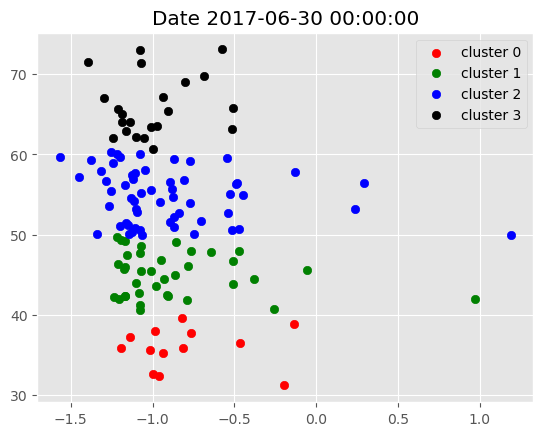

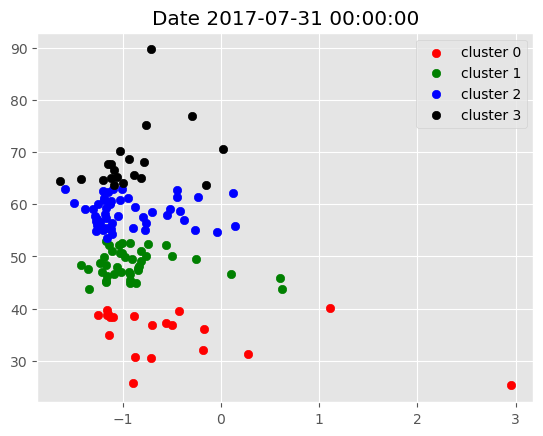

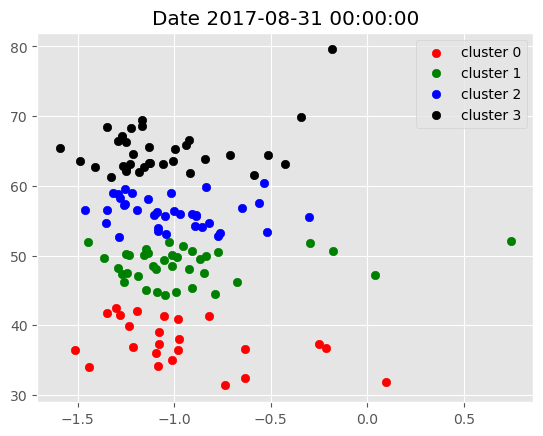

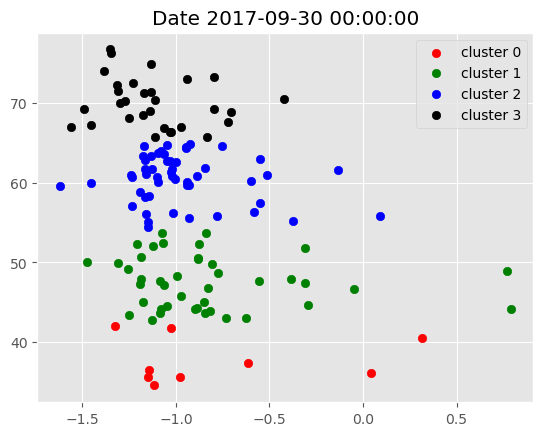

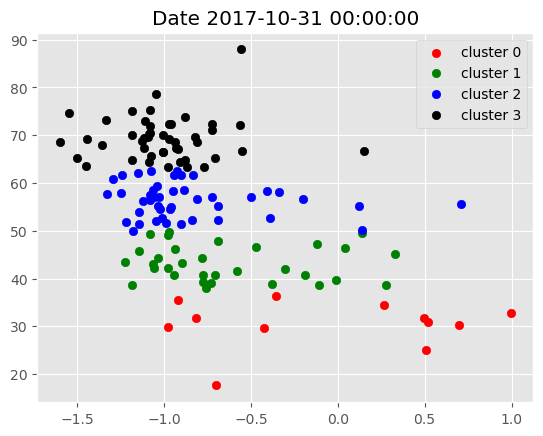

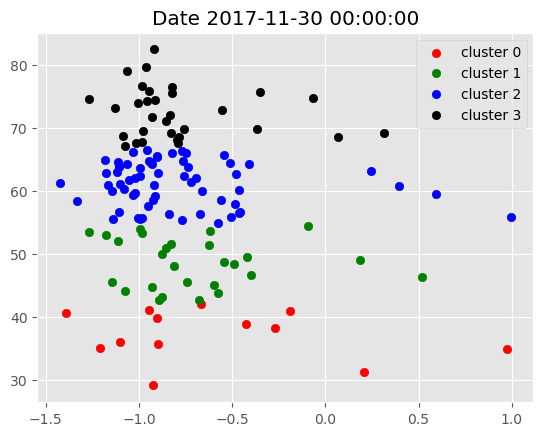

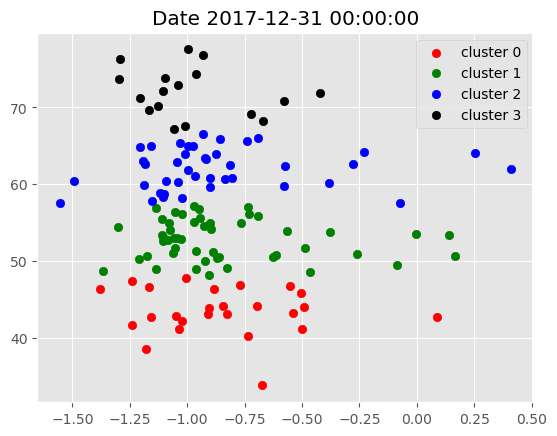

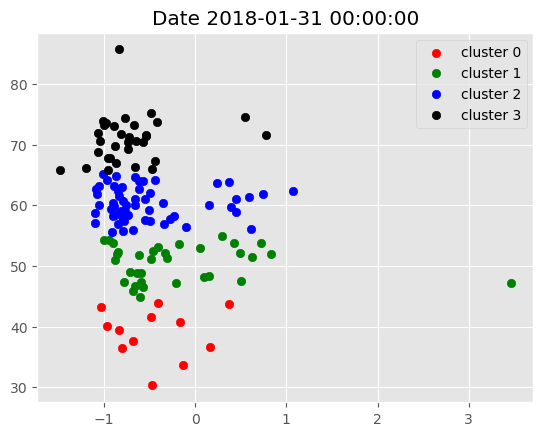

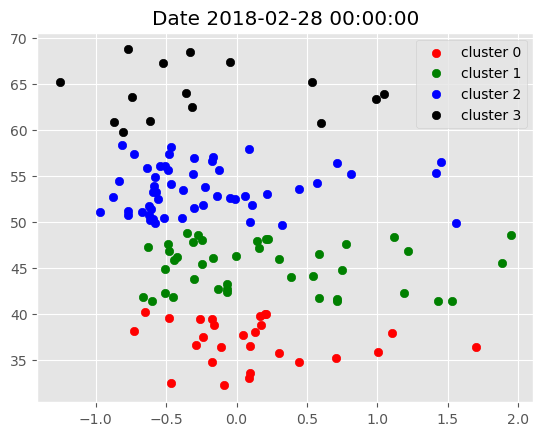

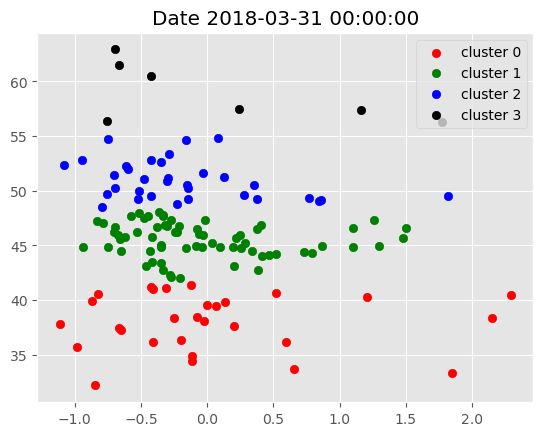

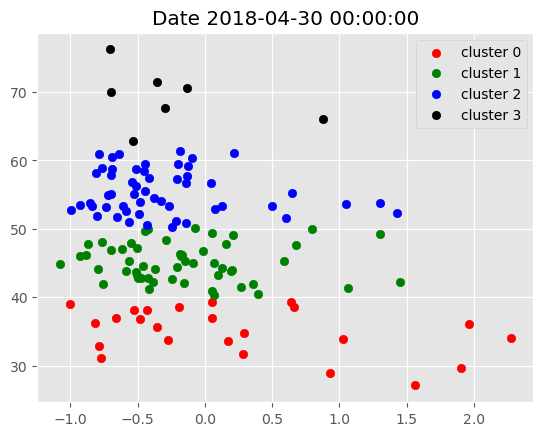

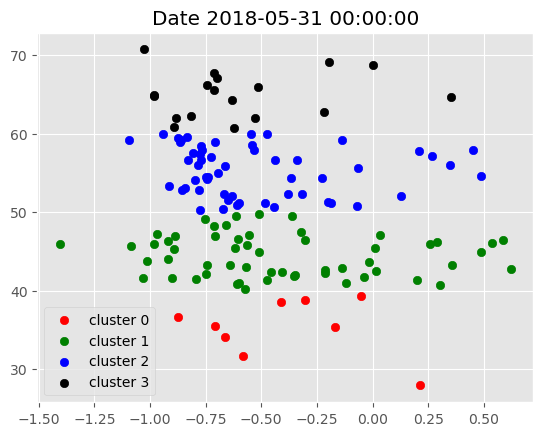

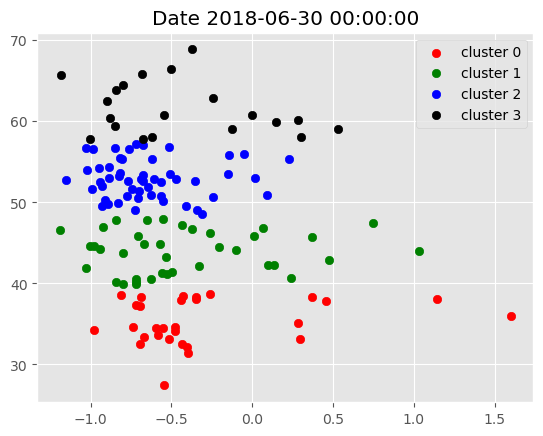

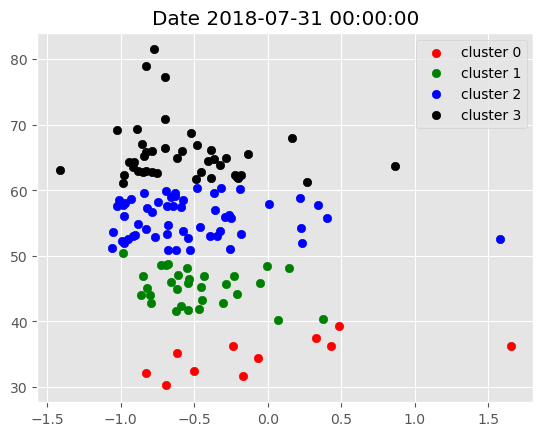

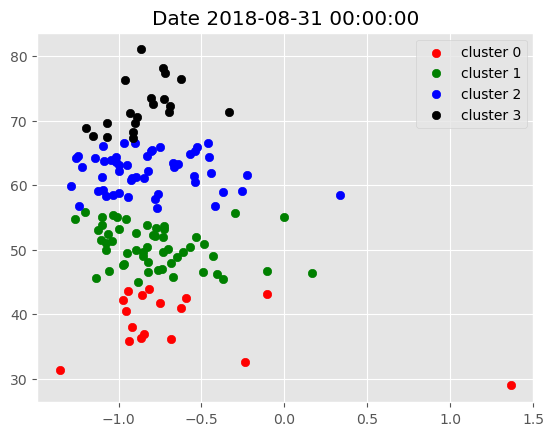

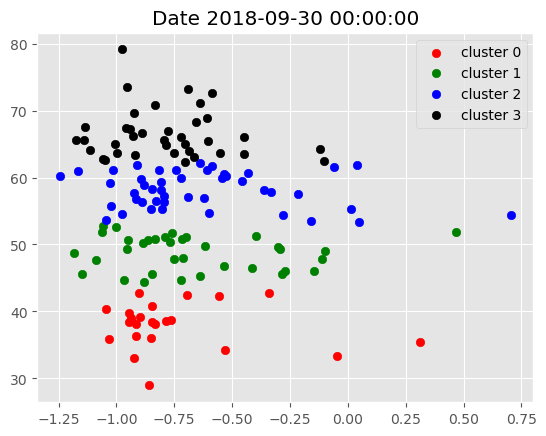

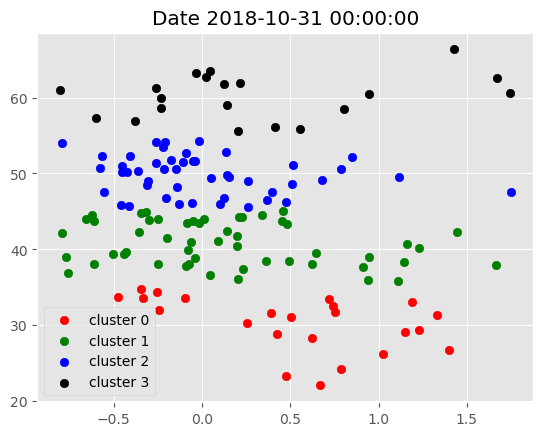

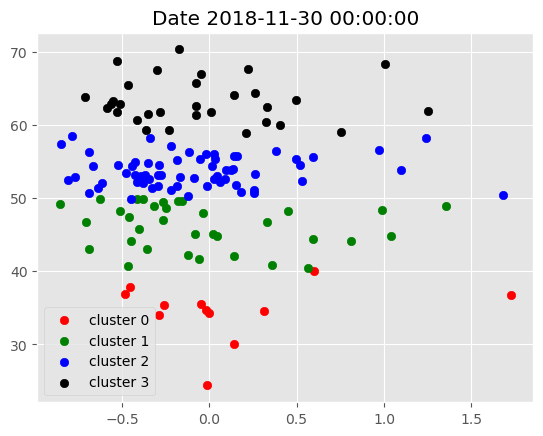

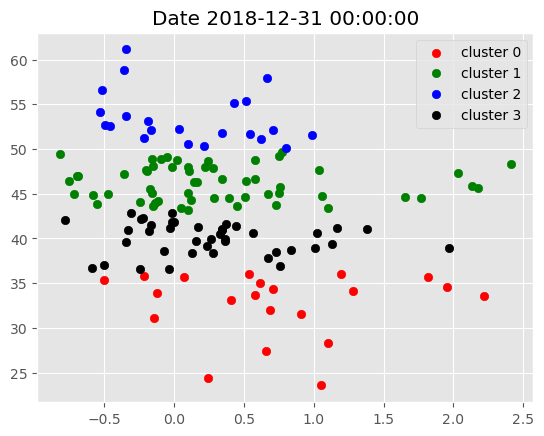

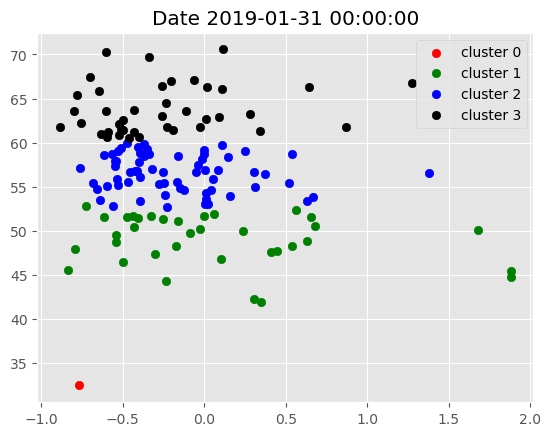

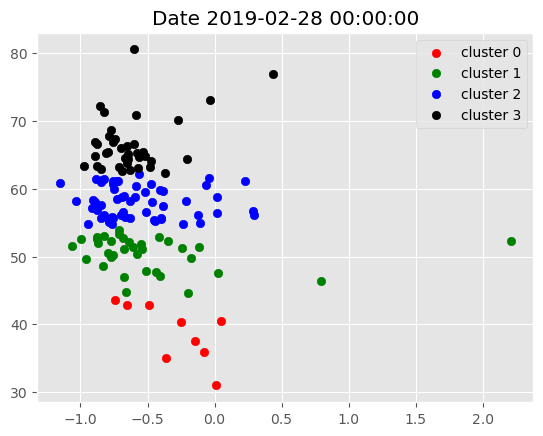

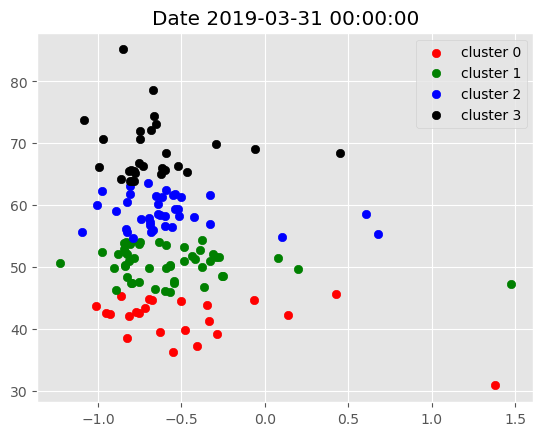

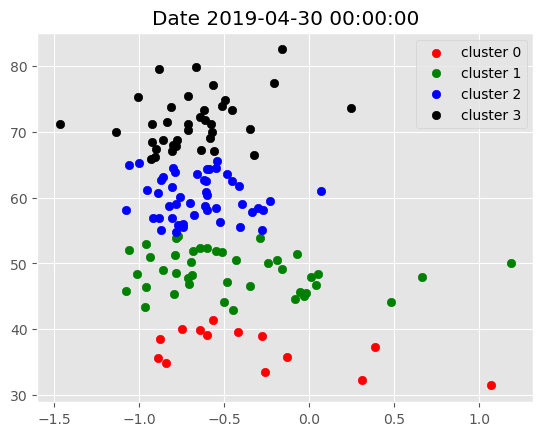

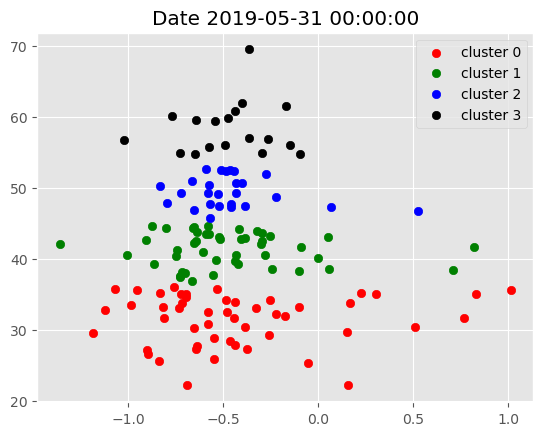

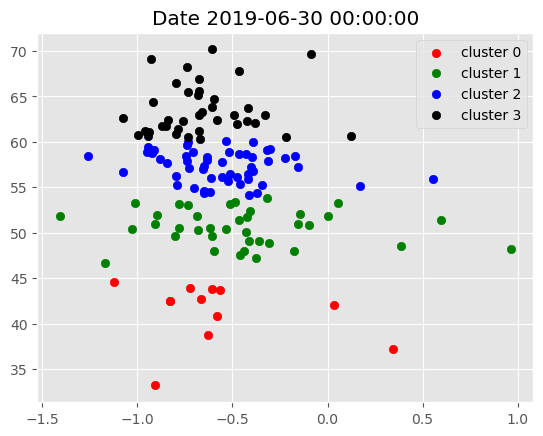

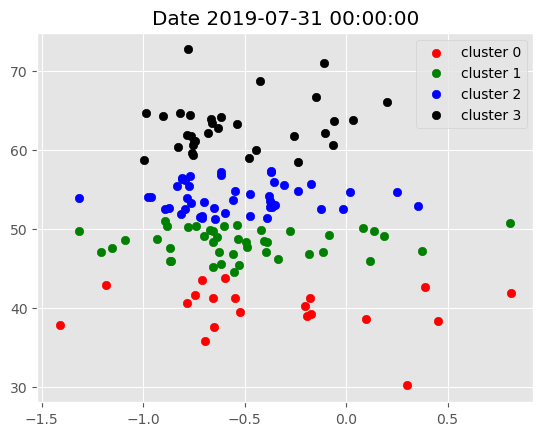

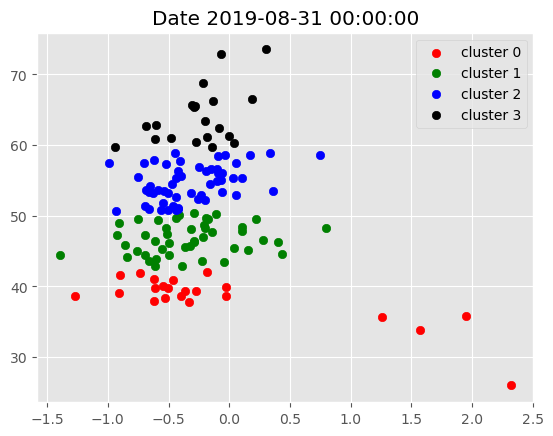

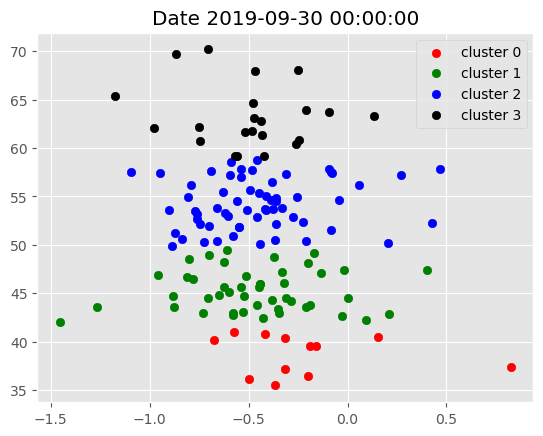

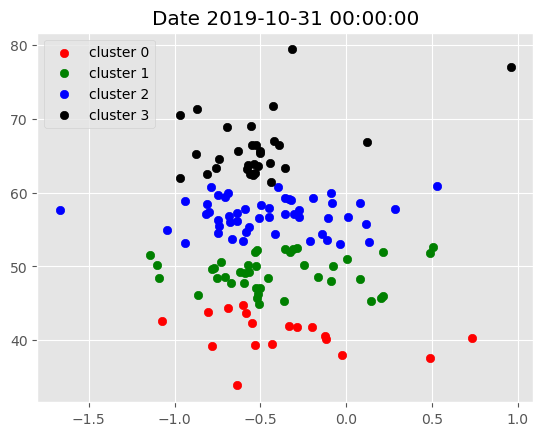

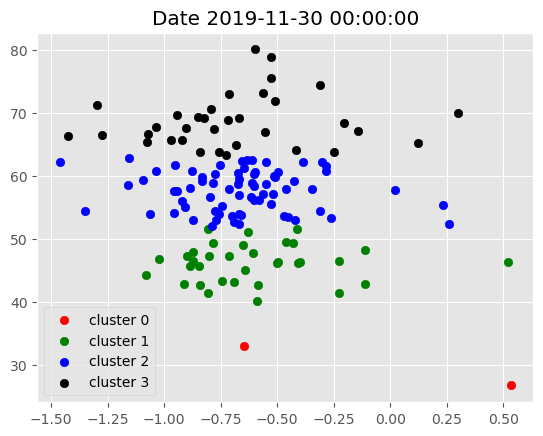

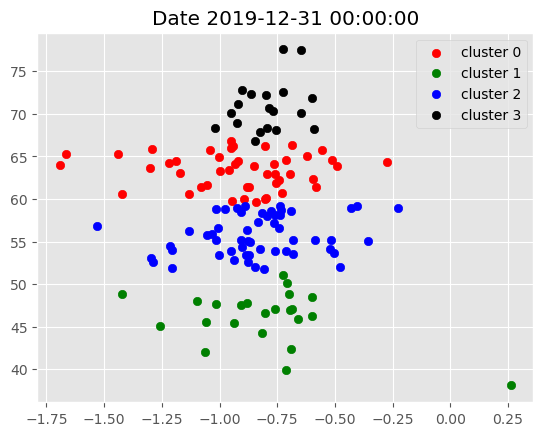

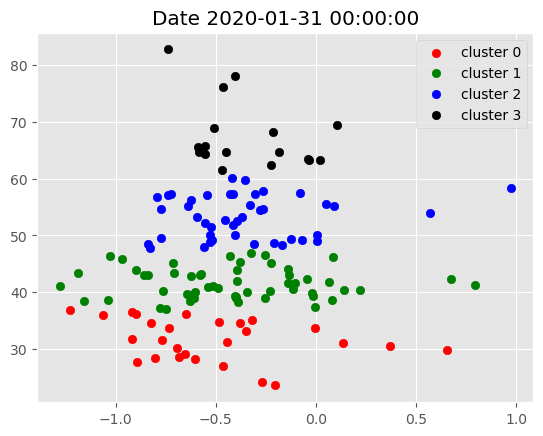

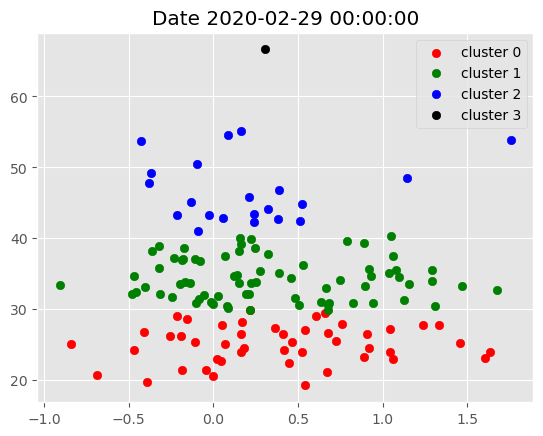

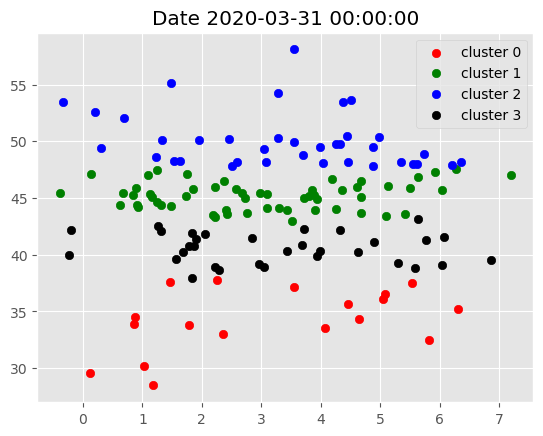

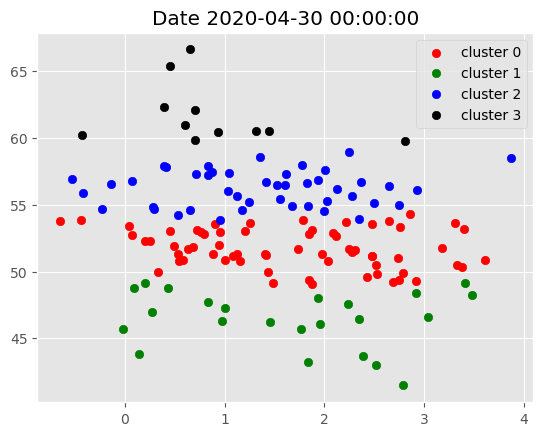

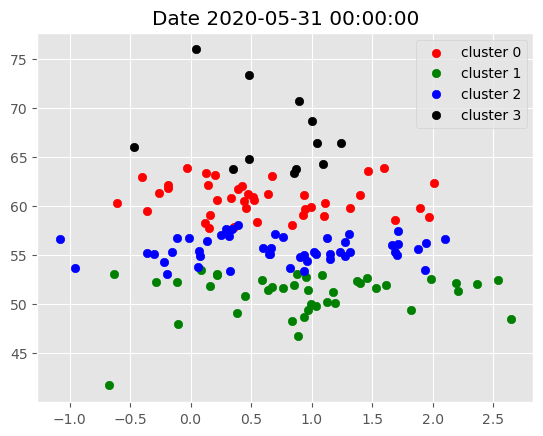

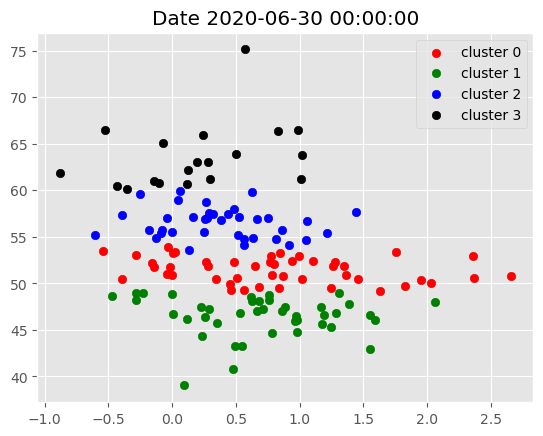

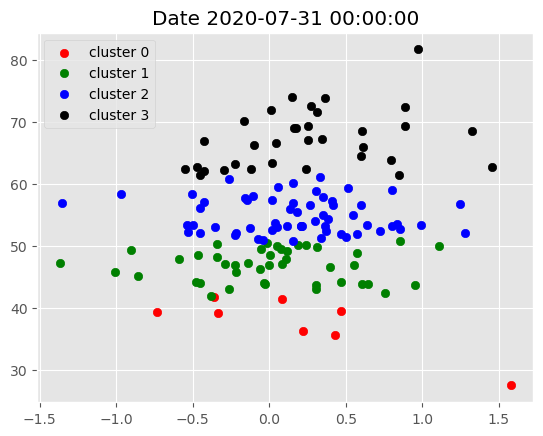

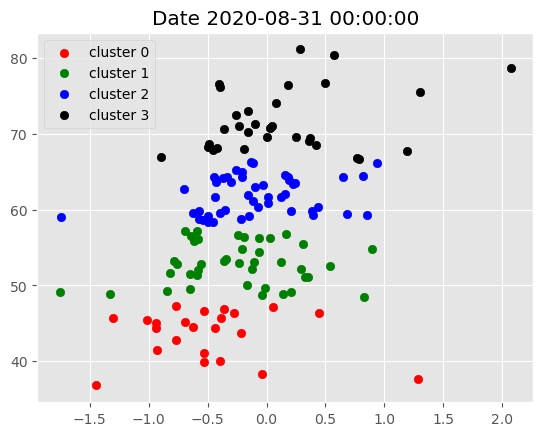

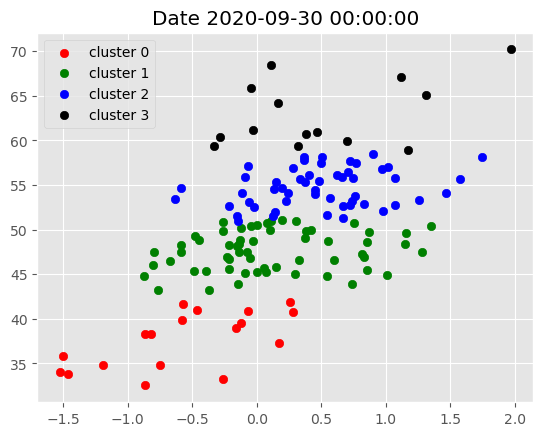

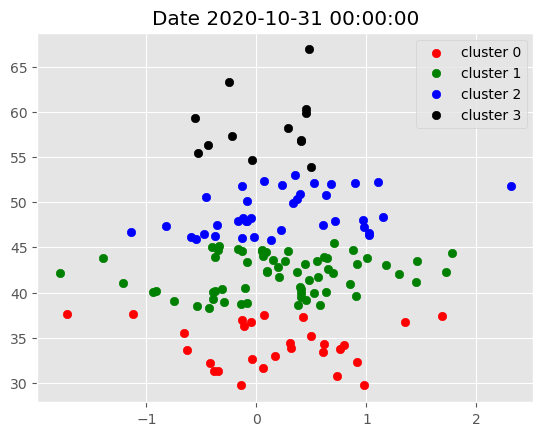

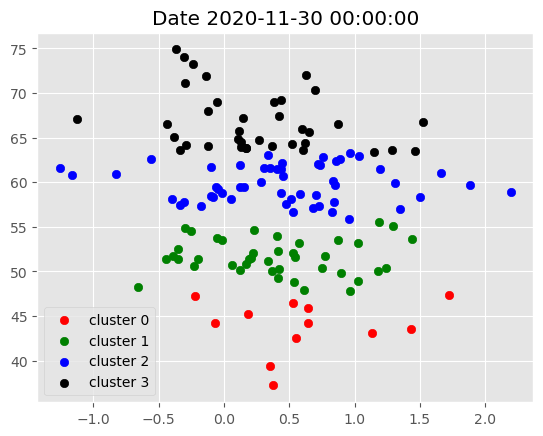

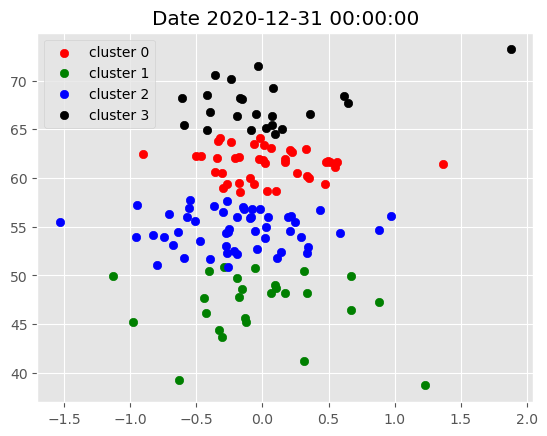

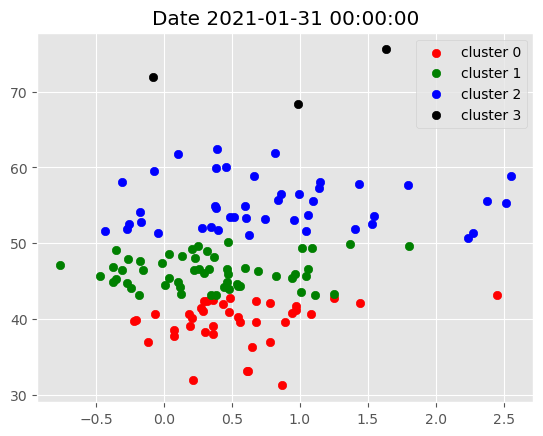

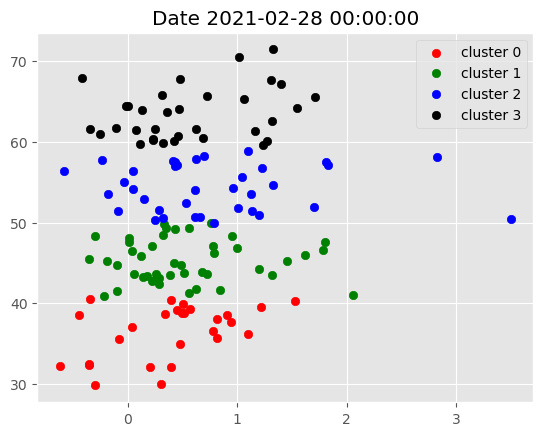

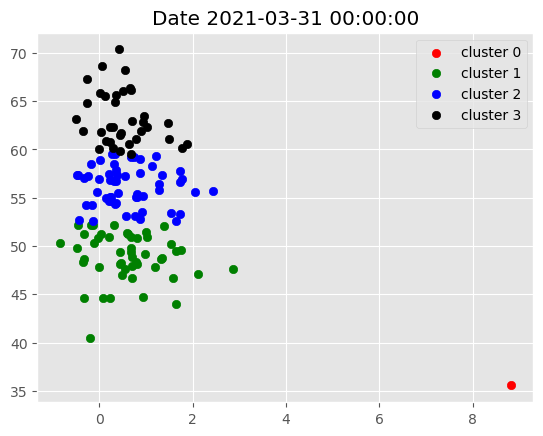

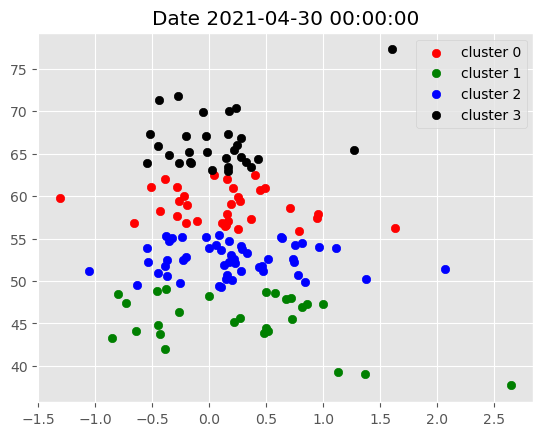

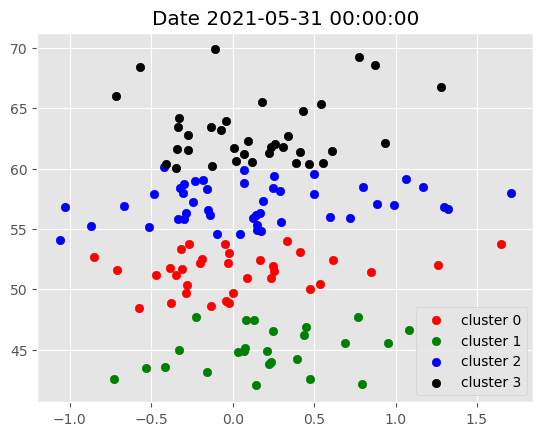

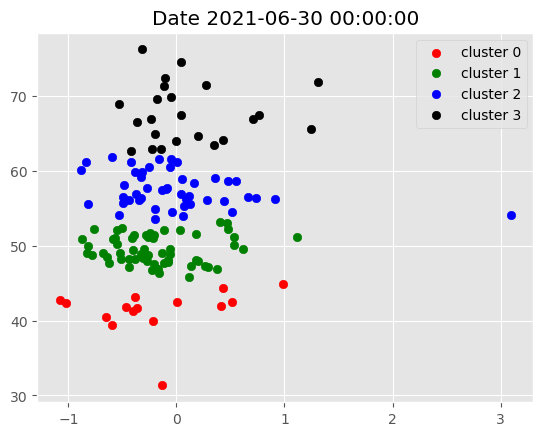

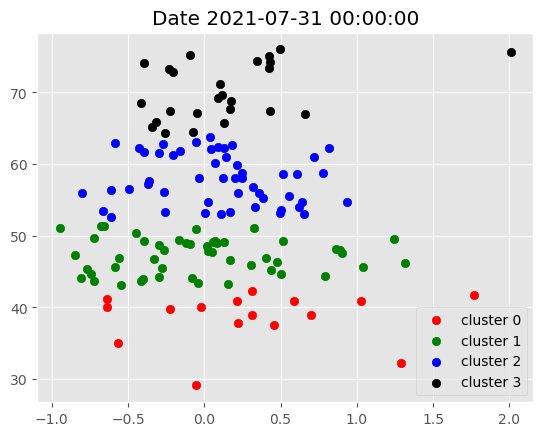

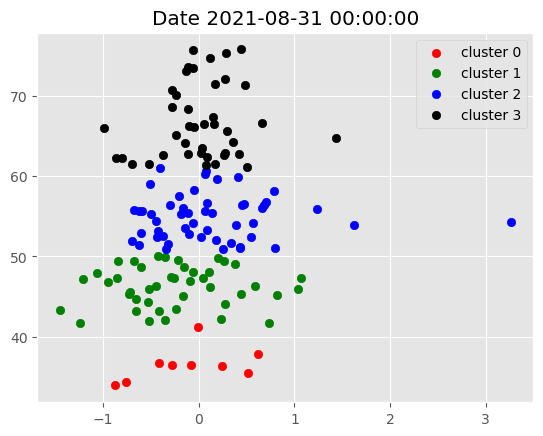

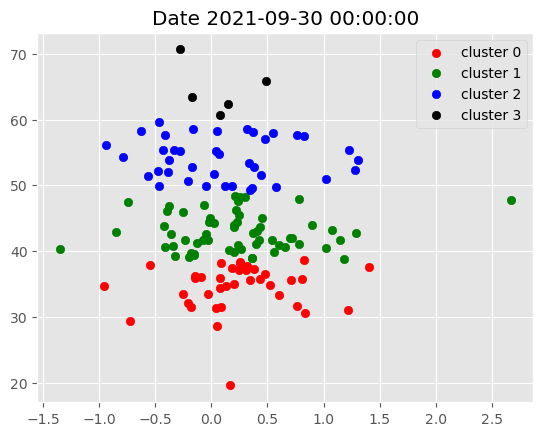

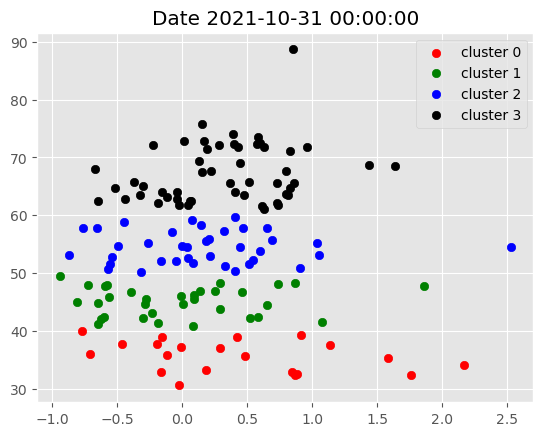

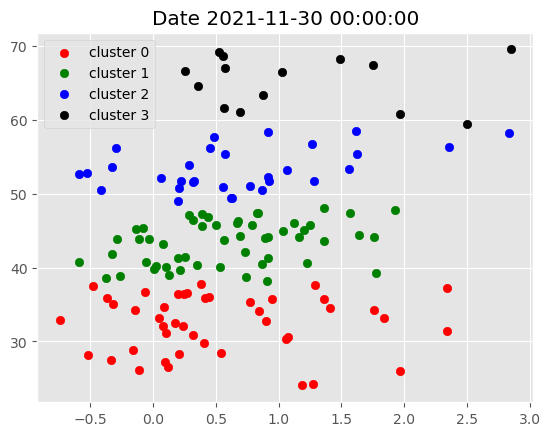

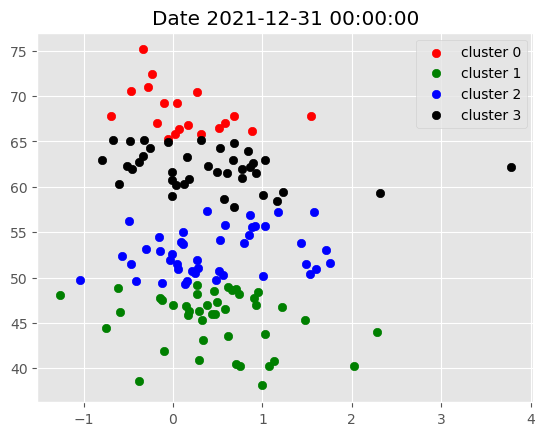

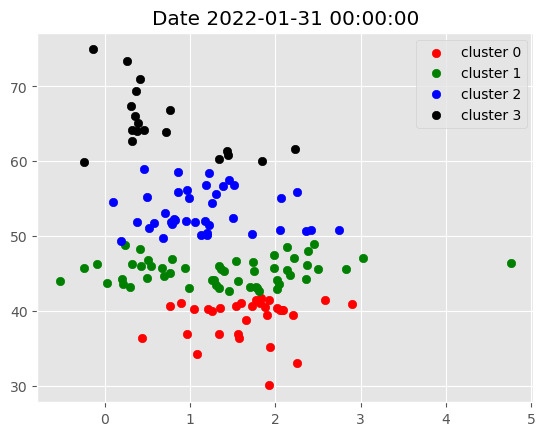

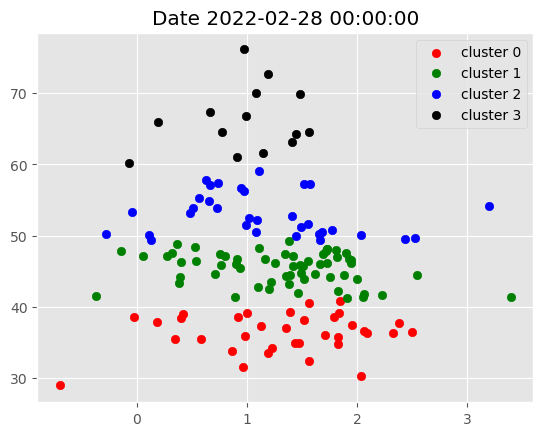

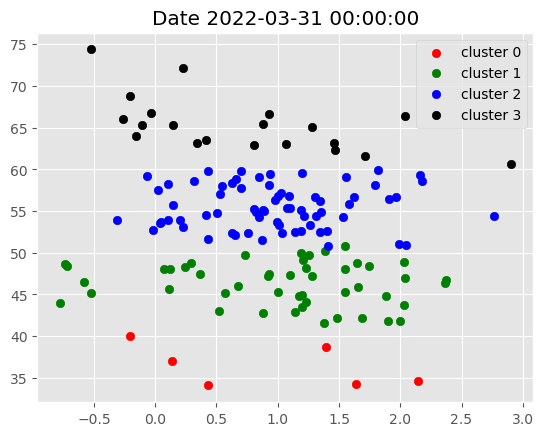

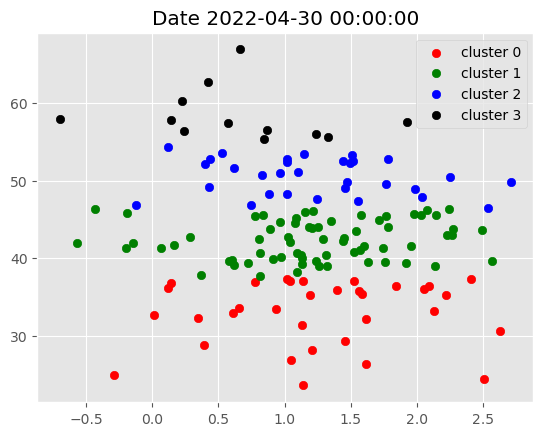

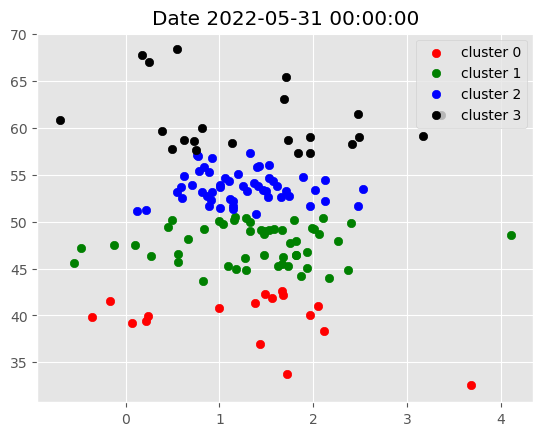

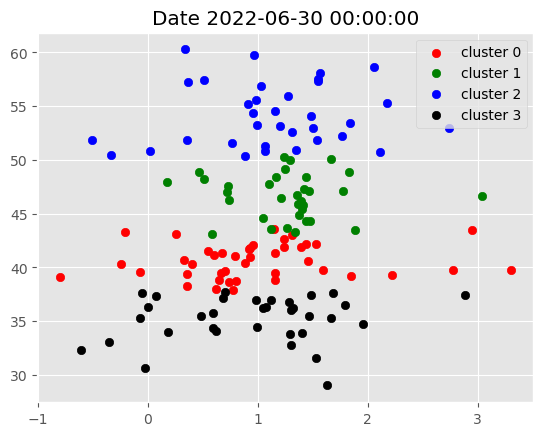

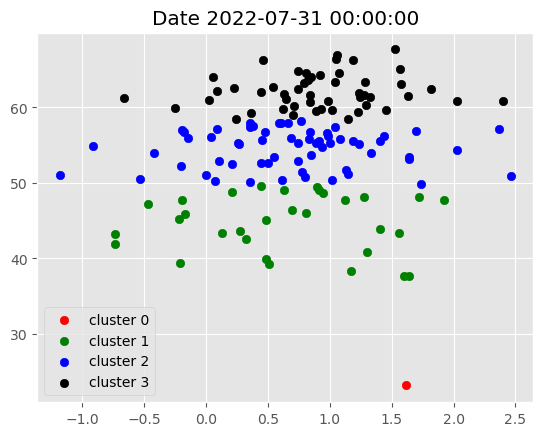

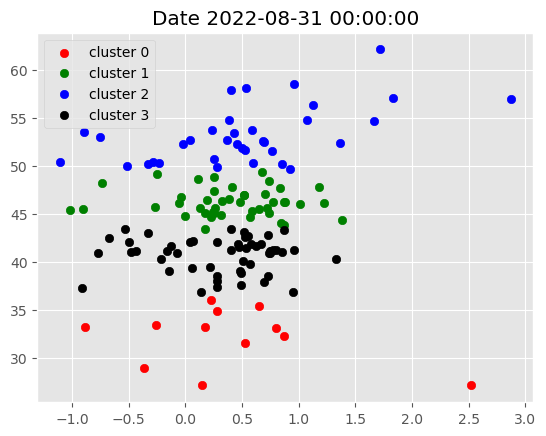

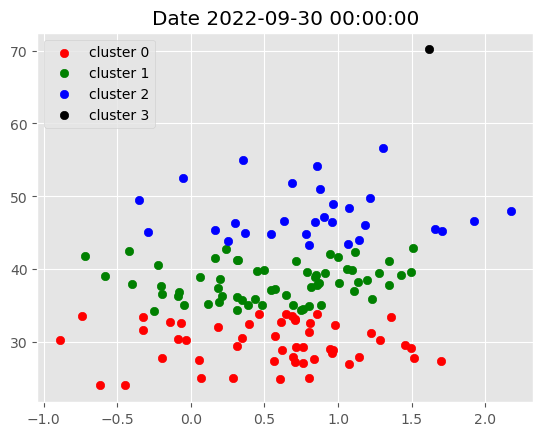

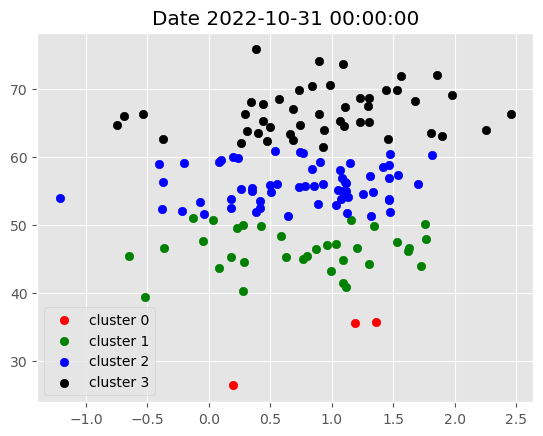

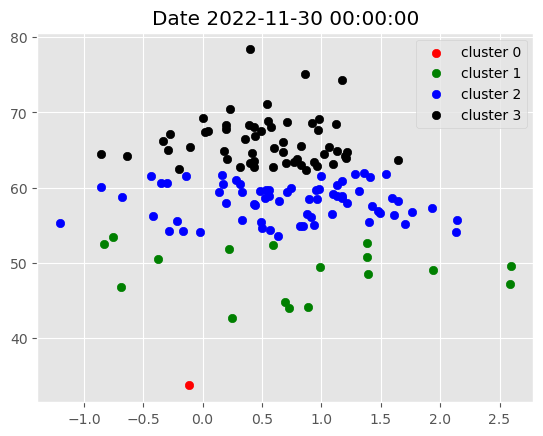

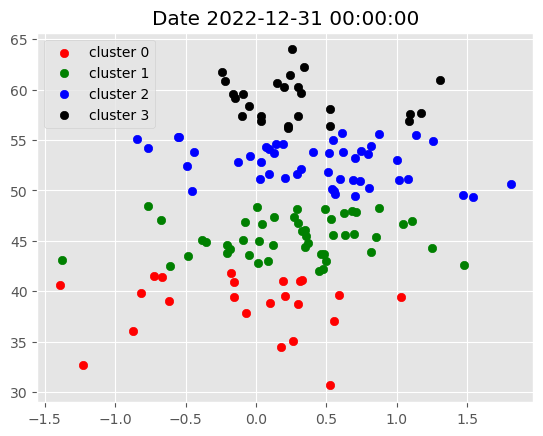

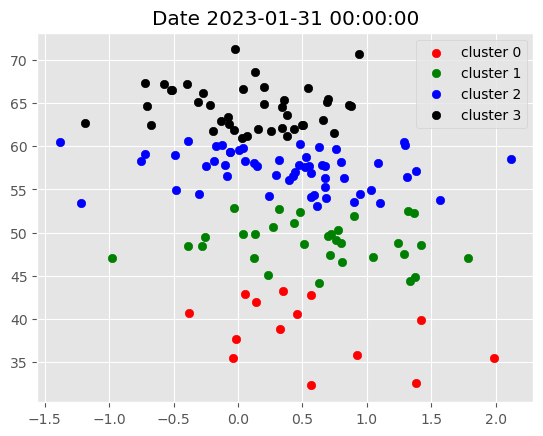

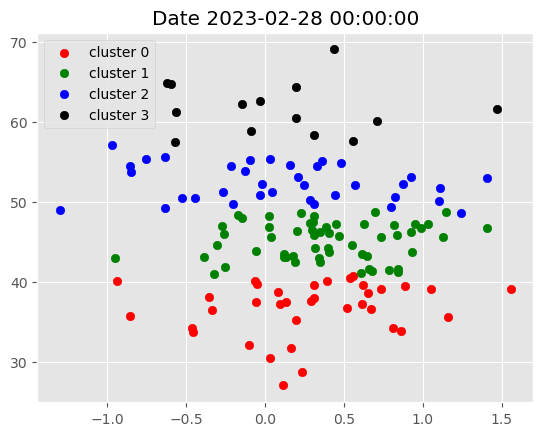

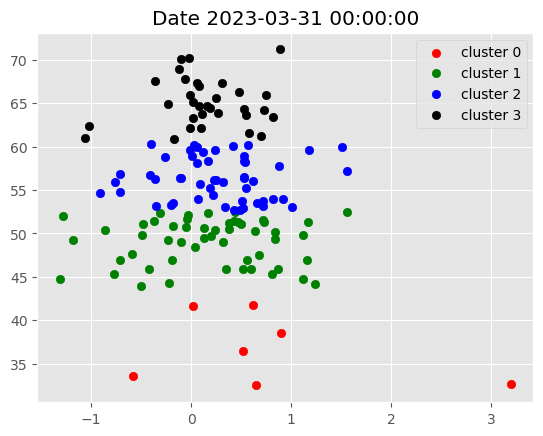

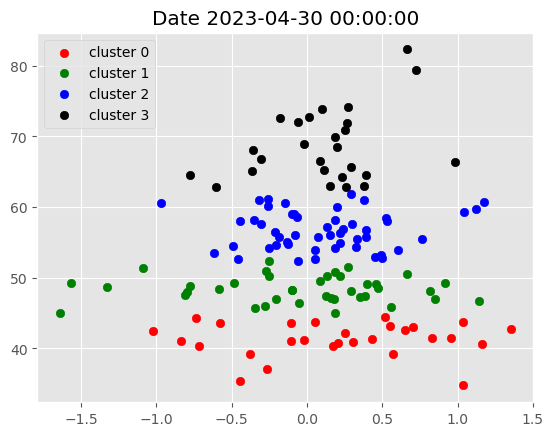

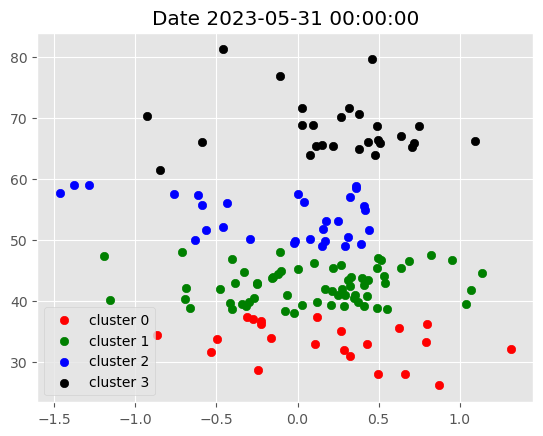

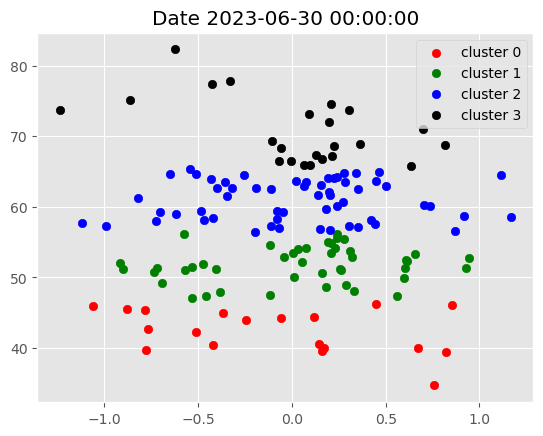

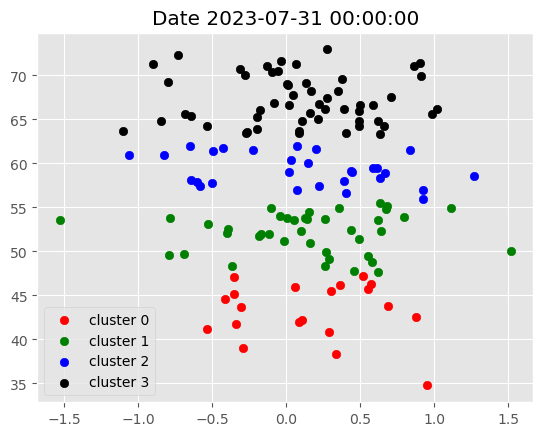

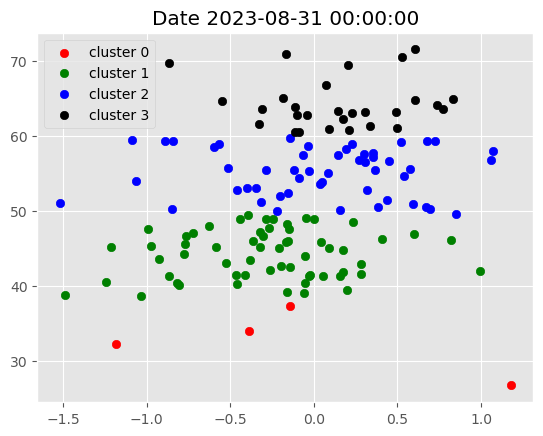

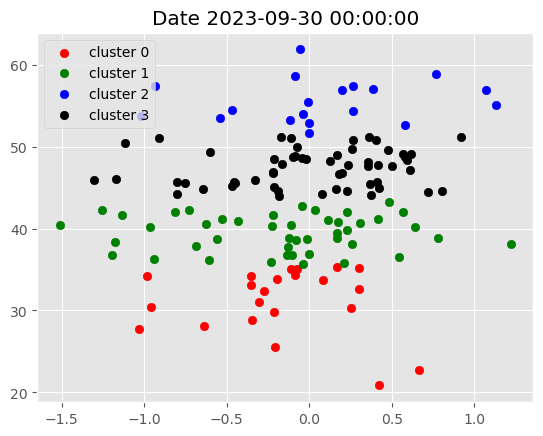

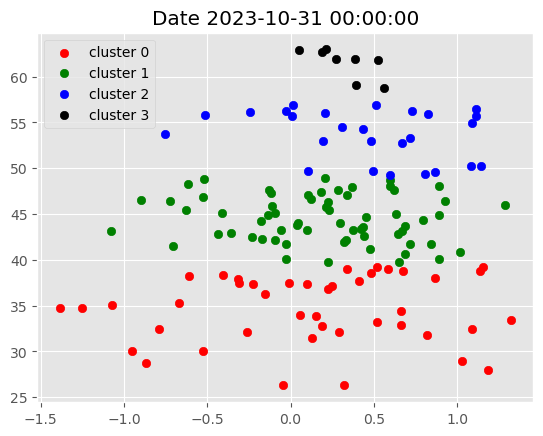

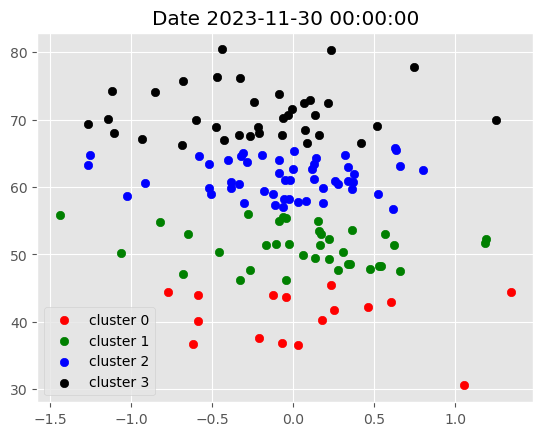

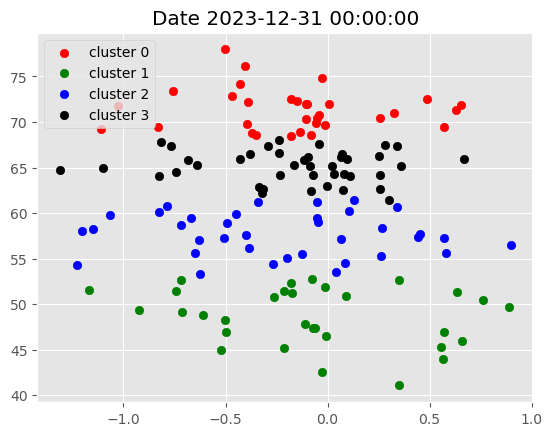

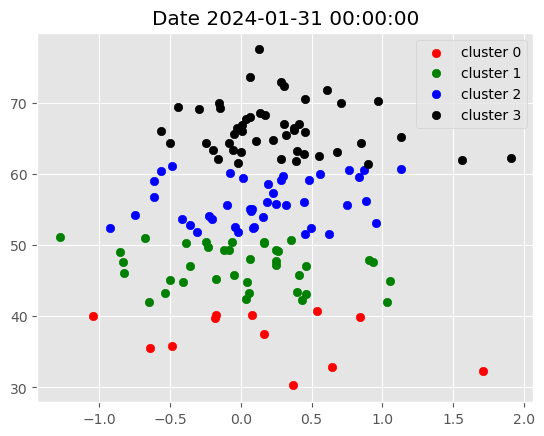

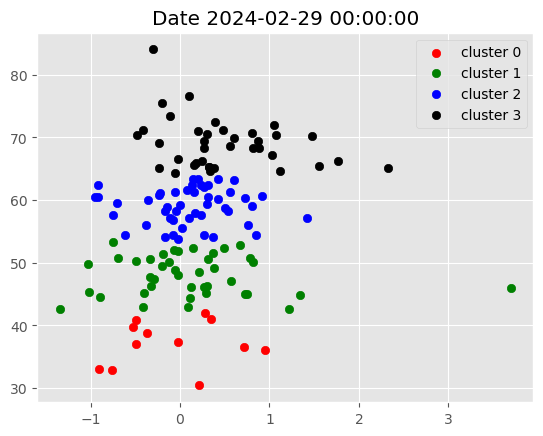

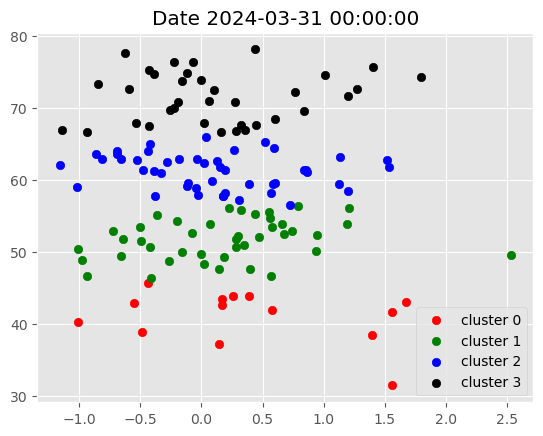

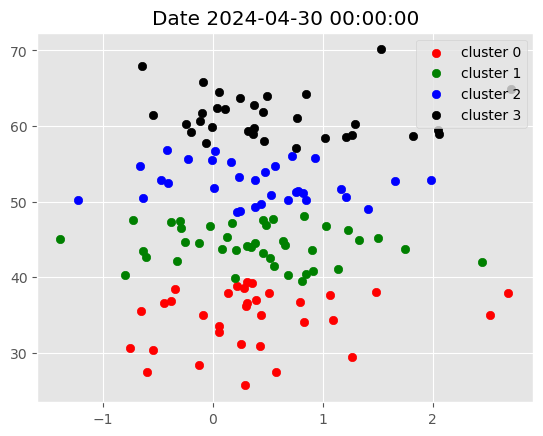

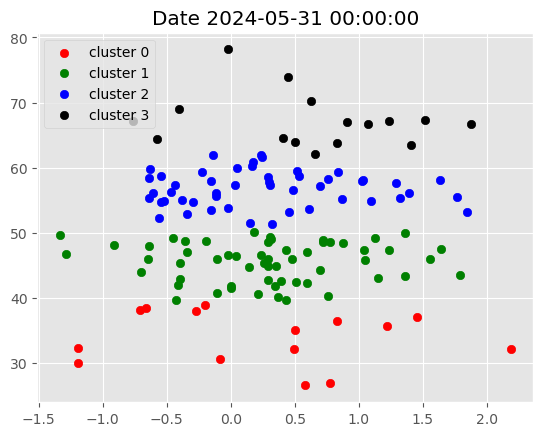

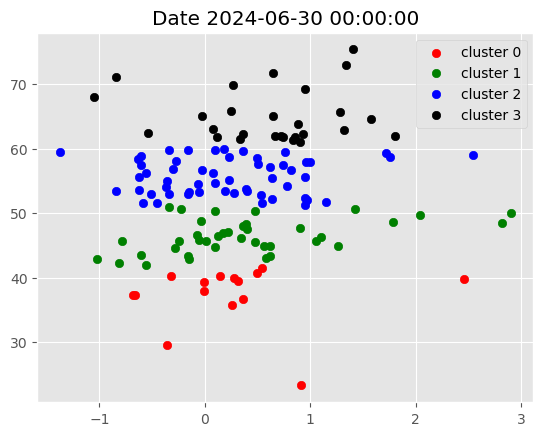

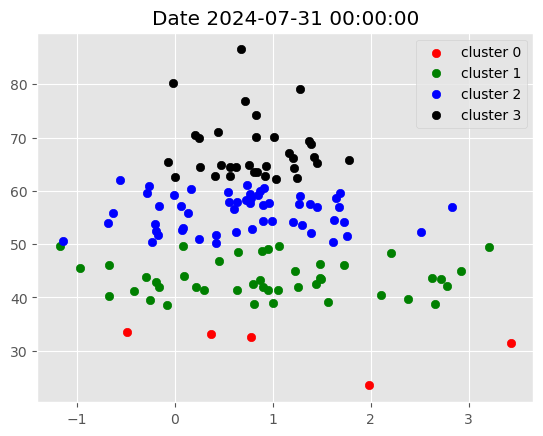

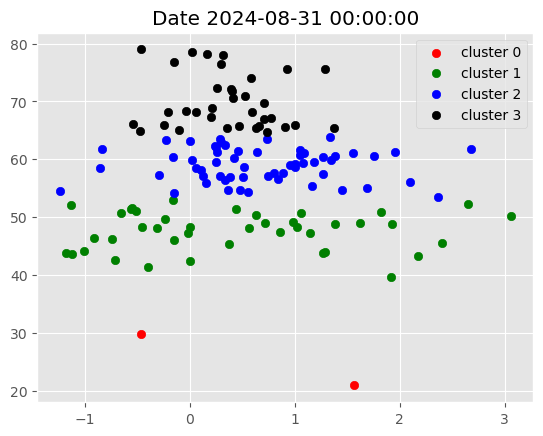

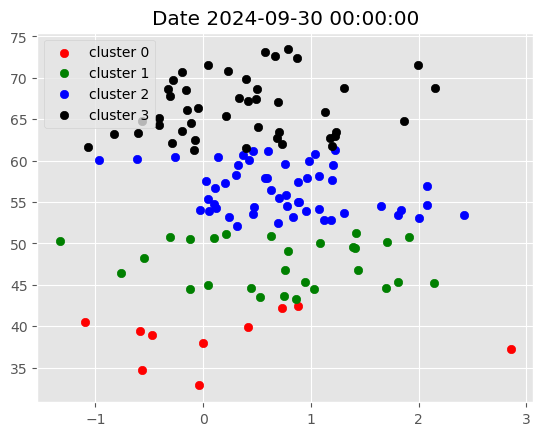

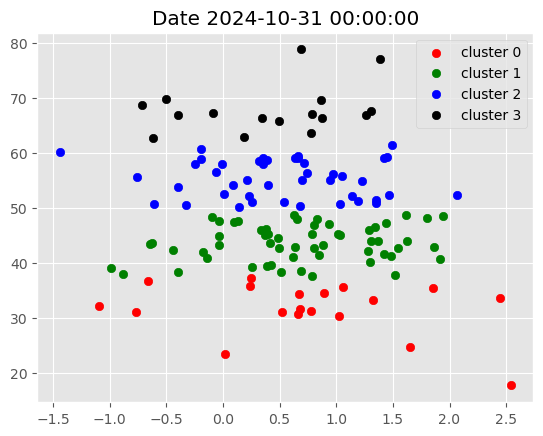

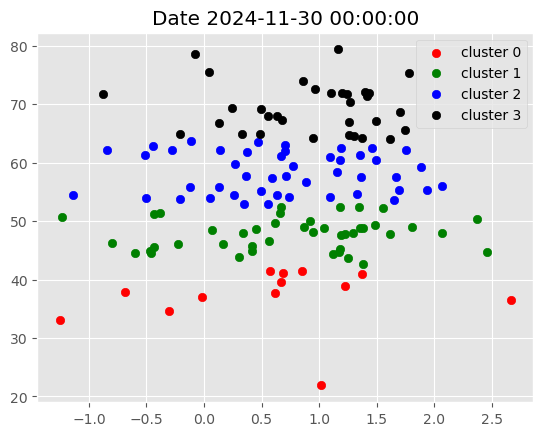

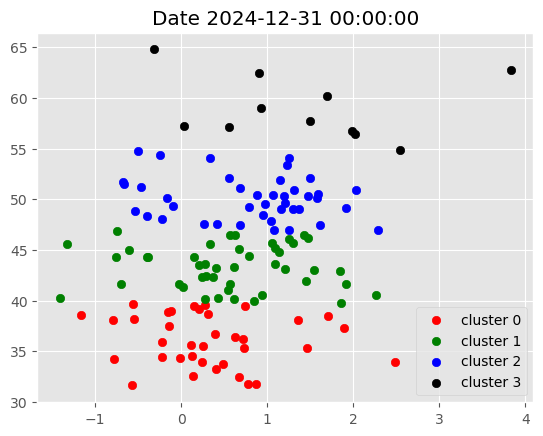

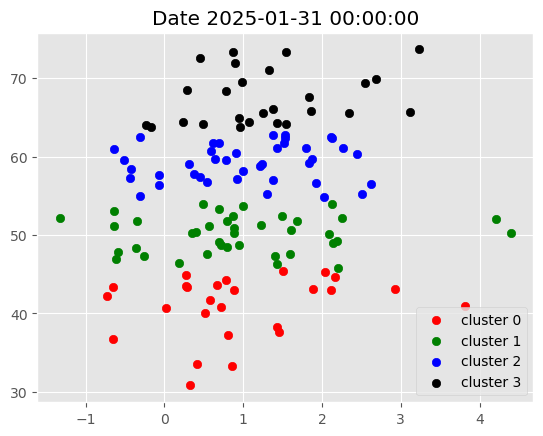

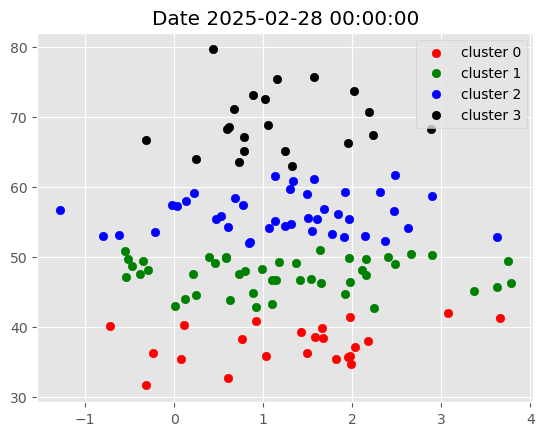

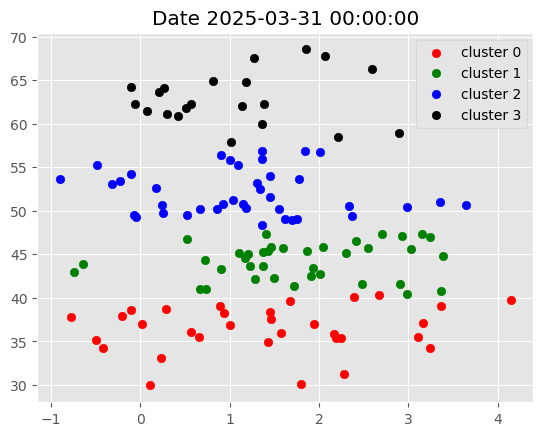

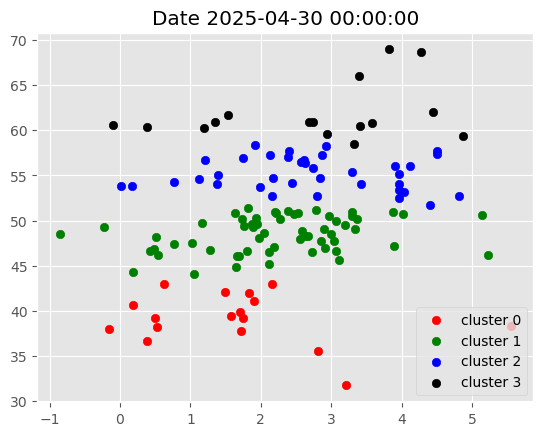

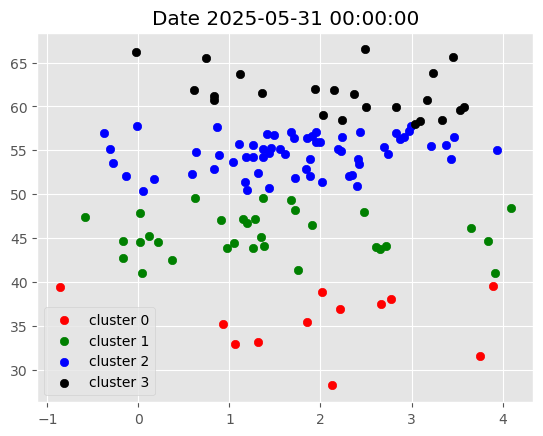

In [71]:
plt.style.use('ggplot')
for i in data.index.get_level_values('date').unique().tolist():
    g = data.xs(i,level=0)
    plt.title(f'Date {i}')
    plot_clusters(g)
#higher rsi means more bullish momentum

In [72]:
#selecting stocks in cluster 3
filtered_df = data[data['cluster'] == 3].copy()
#removing ticker index
filtered_df = filtered_df.reset_index(level=1)
#converting last date of month to first date of next month
filtered_df.index = filtered_df.index+pd.DateOffset(1)
#re applying ticker index
filtered_df = filtered_df.reset_index().set_index(['date','ticker'])
#get dates
dates = filtered_df.index.get_level_values('date').unique().tolist()

In [73]:
#creating a dictionary with keys as dates and values as list of stocks we want to buy
fixed_dates = {}
for d in dates:
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level = 0).index.tolist()
fixed_dates

{'2017-07-01': ['ABBV',
  'ABT',
  'AMGN',
  'AXP',
  'BA',
  'BLK',
  'C',
  'CSX',
  'DAL',
  'FDX',
  'GILD',
  'HUM',
  'ISRG',
  'JPM',
  'LUV',
  'MCD',
  'MDT',
  'MET',
  'NKE',
  'ORCL',
  'SCHW',
  'UNH'],
 '2017-08-01': ['AIG',
  'BA',
  'BKNG',
  'BRK-B',
  'C',
  'CAT',
  'CHTR',
  'CVX',
  'EA',
  'FCX',
  'GILD',
  'LMT',
  'META',
  'NEE',
  'NFLX',
  'NXPI',
  'PG',
  'UNH',
  'VZ',
  'WMT'],
 '2017-09-01': ['AAPL',
  'ABBV',
  'ABT',
  'ADBE',
  'AMGN',
  'BA',
  'BIIB',
  'BMY',
  'BRK-B',
  'CAT',
  'CCL',
  'CHTR',
  'CI',
  'CRM',
  'DD',
  'DLTR',
  'EA',
  'GILD',
  'GM',
  'HUM',
  'ISRG',
  'LMT',
  'MA',
  'MCD',
  'META',
  'MSFT',
  'NEE',
  'NXPI',
  'PFE',
  'PG',
  'PYPL',
  'TMO',
  'UNH',
  'V',
  'VRTX'],
 '2017-10-01': ['ABBV',
  'AMAT',
  'AXP',
  'BA',
  'BLK',
  'BMY',
  'C',
  'CAT',
  'COP',
  'CVX',
  'DLTR',
  'EOG',
  'F',
  'FDX',
  'GM',
  'HAL',
  'HD',
  'INTC',
  'MAR',
  'MET',
  'MU',
  'OXY',
  'SCHW',
  'SLB',
  'TXN',
  'UNP',
  'UP

In [74]:
#define portfolio optimization function
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
def optimize_weights(prices, lower_bound=0):
    #calculate expected returns
    returns = expected_returns.mean_historical_return(prices=prices,frequency=252)
    #calculate covariance
    cov = risk_models.sample_cov(prices=prices,frequency=252)
    #initializing the efficient frontier object
    ef = EfficientFrontier(expected_returns=returns,
                          cov_matrix=cov,
                          weight_bounds=(lower_bound,.1),
                          solver='SCS')
    #calculating the weight of the stock
    weights = ef.max_sharpe()
    return ef.clean_weights()


In [75]:
#downloading fresh daily prices data only for short listed stocks
stocks = data.index.get_level_values('ticker').unique().tolist()
new_df = yf.download(tickers = stocks, start=data.index.get_level_values('date').unique()[0]-pd.DateOffset(months=12),
                    end=data.index.get_level_values('date').unique()[-1],auto_adjust=False)
new_df

[*********************100%***********************]  162 of 162 completed


Price        Adj Close                                                  \
Ticker            AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2016-06-30   21.878300   42.336662   33.261841   98.156586   95.790001   
2016-07-01   21.944662   42.883747   33.456444   98.355843   95.320000   
2016-07-05   21.738695   42.343506   33.371819   97.991951   94.730003   
2016-07-06   21.862278   43.335083   34.547970   98.355843   95.180000   
2016-07-07   21.956106   43.376106   34.996429   97.645401   95.139999   
...                ...         ...         ...         ...         ...   
2025-05-06  198.509995  187.149994  133.059998  303.799988  382.980011   
2025-05-07  196.250000  188.089996  133.949997  306.089996  384.970001   
2025-05-08  197.490005  185.580002  134.000000  308.880005  383.989990   
2025-05-09  198.529999  184.600006  133.240005  307.899994  383.279999   
2025-05-12  210.789993  190.070007  131.990005  322.089996  395.940002   

Price                                                                  ...  \
Ticker             ADI         ADP        ADSK        AIG        AMAT  ...   
Date                                                                   ...   
2016-06-30   47.773163   76.258080   54.139999  42.347042   21.712776  ...   
2016-07-01   47.764736   76.988533   54.340000  42.331032   21.640303  ...   
2016-07-05   46.693531   77.453377   52.799999  41.001919   21.595015  ...   
2016-07-06   46.777889   77.544685   52.959999  41.041958   21.739960  ...   
2016-07-07   47.191181   77.611107   53.529999  41.490334   22.002638  ...   
...                ...         ...         ...        ...         ...  ...   
2025-05-06  195.600006  303.329987  278.640015  82.529999  153.029999  ...   
2025-05-07  199.860001  305.179993  283.359985  81.690002  155.809998  ...   
2025-05-08  202.779999  307.089996  289.619995  81.820000  156.000000  ...   
2025-05-09  207.509995  307.720001  287.480011  82.410004  155.610001  ...   
2025-05-12  223.149994  309.380005  293.200012  83.470001  167.990005  ...   

Price         Volume                                                  \
Ticker           VLO     VRTX        VZ       WBA     WDAY       WDC   
Date                                                                   
2016-06-30  10412900  1418500  22143300   5813200  1479000   8257505   
2016-07-01   5896200  1292700  16092300   4858300  1110000   6305153   
2016-07-05   7937300   870100  20703200   7629300  1813100   7578409   
2016-07-06  11096200  1705300  15761500  10537400  1127700   5647358   
2016-07-07  10444200  1254000  13574100   5560000  1062600  10361471   
...              ...      ...       ...       ...      ...       ...   
2025-05-06   3051600  8000700  12131500   8029800   905000   4952400   
2025-05-07   2500000  3996700  12826600  10475500  1117900   7564600   
2025-05-08   3289400  2940800  14967400  10057700  1804500   5320500   
2025-05-09   2167300  1641300  10877100   8465200  1324300   4960100   
2025-05-12   4135077  1970187  16316065  17395644  1859352   6811817   

Price                                              
Ticker           WFC       WMT     WYNN       XOM  
Date                                               
2016-06-30  22538800  26140800  2580700  14073700  
2016-07-01  19013600  22916400  2821500   9946300  
2016-07-05  22213000  32245800  2405100  10744100  
2016-07-06  19024100  33188100  2133700  13144400  
2016-07-07  17946200  23378400  1999500  12240700  
...              ...       ...      ...       ...  
2025-05-06  18095100  10626000  3011500  16303400  
2025-05-07  14310300  11301300  3846700  12332200  
2025-05-08  19957500  14461100  3041300  19196500  
2025-05-09  11136900  13692100  3216400  10989000  
2025-05-12  17633743  26637375  4636756  14239308  

[2229 rows x 972 columns]

In [76]:
columns_level_1 = new_df.columns.get_level_values(0).unique()
print(columns_level_1)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [77]:
#calculating returns per day
returns_dataframe = np.log(new_df['Adj Close']).diff()
portfolio_df = pd.DataFrame()
returns_dataframe

Ticker          AAPL      ABBV       ABT       ACN      ADBE       ADI  \
Date                                                                     
2016-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
2016-07-01  0.003029  0.012839  0.005834  0.002028 -0.004919 -0.000176   
2016-07-05 -0.009430 -0.012678 -0.002533 -0.003707 -0.006209 -0.022682   
2016-07-06  0.005669  0.023147  0.034637  0.003707  0.004739  0.001805   
2016-07-07  0.004283  0.000946  0.012897 -0.007249 -0.000420  0.008796   
...              ...       ...       ...       ...       ...       ...   
2025-05-06 -0.001912 -0.046561  0.003463 -0.012788  0.005026 -0.010780   
2025-05-07 -0.011450  0.005010  0.006666  0.007510  0.005183  0.021545   
2025-05-08  0.006299 -0.013434  0.000373  0.009074 -0.002549  0.014505   
2025-05-09  0.005252 -0.005295 -0.005688 -0.003178 -0.001851  0.023058   
2025-05-12  0.059922  0.029201 -0.009426  0.045056  0.032497  0.072665   

Ticker           ADP      ADSK       AIG      AMAT  ...       VLO      VRTX  \
Date                                                ...                       
2016-06-30       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2016-07-01  0.009533  0.003687 -0.000378 -0.003343  ...  0.008396  0.019798   
2016-07-05  0.006020 -0.028749 -0.031902 -0.002095  ... -0.031404 -0.014118   
2016-07-06  0.001178  0.003026  0.000976  0.006690  ... -0.023961  0.035765   
2016-07-07  0.000856  0.010705  0.010866  0.012010  ... -0.029616  0.004340   
...              ...       ...       ...       ...  ...       ...       ...   
2025-05-06 -0.002075 -0.005119 -0.006281 -0.010272  ... -0.019803 -0.105674   
2025-05-07  0.006080  0.016797 -0.010230  0.018003  ... -0.000427 -0.034382   
2025-05-08  0.006239  0.021852  0.001590  0.001219  ...  0.040059 -0.012078   
2025-05-09  0.002049 -0.007416  0.007185 -0.002503  ...  0.009810 -0.010789   
2025-05-12  0.005380  0.019702  0.012780  0.076552  ...  0.059682  0.033276   

Ticker            VZ       WBA      WDAY       WDC       WFC       WMT  \
Date                                                                     
2016-06-30       NaN       NaN       NaN       NaN       NaN       NaN   
2016-07-01  0.006960 -0.002525 -0.004429 -0.016857 -0.006359 -0.002880   
2016-07-05  0.005321  0.005523 -0.022996 -0.038386 -0.017589  0.004522   
2016-07-06  0.005258 -0.023870 -0.000689  0.016412  0.009477  0.009254   
2016-07-07 -0.015765 -0.012959  0.016258  0.047260  0.003210 -0.003936   
...              ...       ...       ...       ...       ...       ...   
2025-05-06  0.013913 -0.000910 -0.002217 -0.016570 -0.005023 -0.007884   
2025-05-07 -0.005906  0.005445  0.011197  0.000226 -0.004091  0.002837   
2025-05-08 -0.006400  0.009905  0.029104  0.000000  0.001775 -0.014267   
2025-05-09  0.000000  0.005362  0.004641 -0.004525 -0.006329 -0.004899   
2025-05-12 -0.014086  0.015915  0.028114  0.054497  0.032990  0.000310   

Ticker          WYNN       XOM  
Date                            
2016-06-30       NaN       NaN  
2016-07-01  0.012608  0.001066  
2016-07-05 -0.029744 -0.008777  
2016-07-06  0.009273  0.011437  
2016-07-07 -0.010845 -0.012082  
...              ...       ...  
2025-05-06  0.006486  0.013848  
2025-05-07  0.007158 -0.000955  
2025-05-08  0.028940  0.013860  
2025-05-09  0.015357  0.011623  
2025-05-12  0.079019  0.017093  

[2229 rows x 162 columns]

In [86]:
for start_date in fixed_dates.keys():
    try:
        #end date is the last day of the month
        end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd(0)).strftime('%Y-%m-%d')
        #selected stocks for the month
        cols = fixed_dates[start_date]
        #optimizing for 1 year previous data
        optimization_start_date = (pd.to_datetime(start_date)-pd.DateOffset(months=12)).strftime('%Y-%m-%d')
        optimization_end_date = (pd.to_datetime(start_date)-pd.DateOffset(days=1)).strftime('%Y-%m-%d')
        optimization_df = new_df[optimization_start_date:optimization_end_date]['Adj Close'][cols]
        #in case optimization fails due to lack of data
        success = False
        try:
            weights = optimize_weights(prices=optimization_df, lower_bound = round(1/(len(optimization_df.columns)*2),3))
            weights = pd.DataFrame(weights, index=pd.Series(0))
            success = True
        except:
            print(f'Max sharpie optimization failed for {start_date}, continuing with equal weights')
        if success == False:
            weights = pd.DataFrame([1/len(optimization_df.columns) for i in range(len(optimization_df.columns))],
                                  index=optimization_df.columns.tolist(),
                                  columns=pd.Series(0)).T
        temp_df = returns_dataframe[start_date:end_date]
        temp_df = temp_df.stack().to_frame('return').reset_index(level=0)\
                    .merge(weights.stack().to_frame('weight').reset_index(level=0,drop=True),
                          left_index=True,
                          right_index=True)\
                    .reset_index().set_index(['Date','Ticker']).unstack().stack()
        temp_df.index.names = ['date','ticker']
        temp_df['weighted_return'] = temp_df['return']*temp_df['weight']
        temp_df = temp_df.groupby(level=0)['weighted_return'].sum().to_frame('Strategy Return')
        #portfolio dataframe
        portfolio_df = pd.concat([portfolio_df,temp_df], axis=0)
    except Exception as e:
        print(e)

portfolio_df = portfolio_df.drop_duplicates()
portfolio_df

Max sharpie optimization failed for 2018-04-01, continuing with equal weights
Max sharpie optimization failed for 2018-05-01, continuing with equal weights
Max sharpie optimization failed for 2020-03-01, continuing with equal weights
Max sharpie optimization failed for 2020-04-01, continuing with equal weights
Max sharpie optimization failed for 2021-02-01, continuing with equal weights
Max sharpie optimization failed for 2021-10-01, continuing with equal weights
Max sharpie optimization failed for 2022-07-01, continuing with equal weights
Max sharpie optimization failed for 2022-09-01, continuing with equal weights
Max sharpie optimization failed for 2022-10-01, continuing with equal weights
Max sharpie optimization failed for 2023-11-01, continuing with equal weights
'return'


Strategy Return  SPY Buy&Hold_x  SPY Buy&Hold_y
2017-07-03         0.001491        0.001694        0.001694
2017-07-03         0.001491             NaN        0.001694
2017-07-05         0.008096        0.002309        0.002309
2017-07-05         0.008096             NaN        0.002309
2017-07-06        -0.007778       -0.009186       -0.009186
...                     ...             ...             ...
2025-05-06        -0.025267             NaN             NaN
2025-05-07        -0.002889             NaN             NaN
2025-05-08        -0.001649             NaN             NaN
2025-05-09        -0.006177             NaN             NaN
2025-05-12        -0.003788             NaN             NaN

[5928 rows x 3 columns]

In [87]:
#visualize portfolio returns and compare to SP500 returns
spy = yf.download(tickers='SPY',
                 start='2017-06-01',
                 end=dt.date.today(),auto_adjust=False)
spy_ret = np.log(spy[['Adj Close']]).diff().dropna().rename({'Adj Close':'SPY Buy&Hold'},axis=1)
spy_ret.columns = spy_ret.columns.get_level_values(0)  # Extract single-level column names
portfolio_df = portfolio_df.merge(spy_ret,
                                 left_index=True,
                                 right_index=True)
portfolio_df

[*********************100%***********************]  1 of 1 completed


Strategy Return  SPY Buy&Hold_x  SPY Buy&Hold_y  SPY Buy&Hold
2017-07-03         0.001491        0.001694        0.001694      0.001694
2017-07-03         0.001491             NaN        0.001694      0.001694
2017-07-03         0.001491             NaN             NaN      0.001694
2017-07-05         0.008096        0.002309        0.002309      0.002309
2017-07-05         0.008096             NaN        0.002309      0.002309
...                     ...             ...             ...           ...
2025-05-09        -0.006177             NaN       -0.001275     -0.001275
2025-05-09        -0.006177             NaN             NaN     -0.001275
2025-05-12        -0.003788        0.032513        0.032513      0.032513
2025-05-12        -0.003788             NaN        0.032513      0.032513
2025-05-12        -0.003788             NaN             NaN      0.032513

[5928 rows x 4 columns]

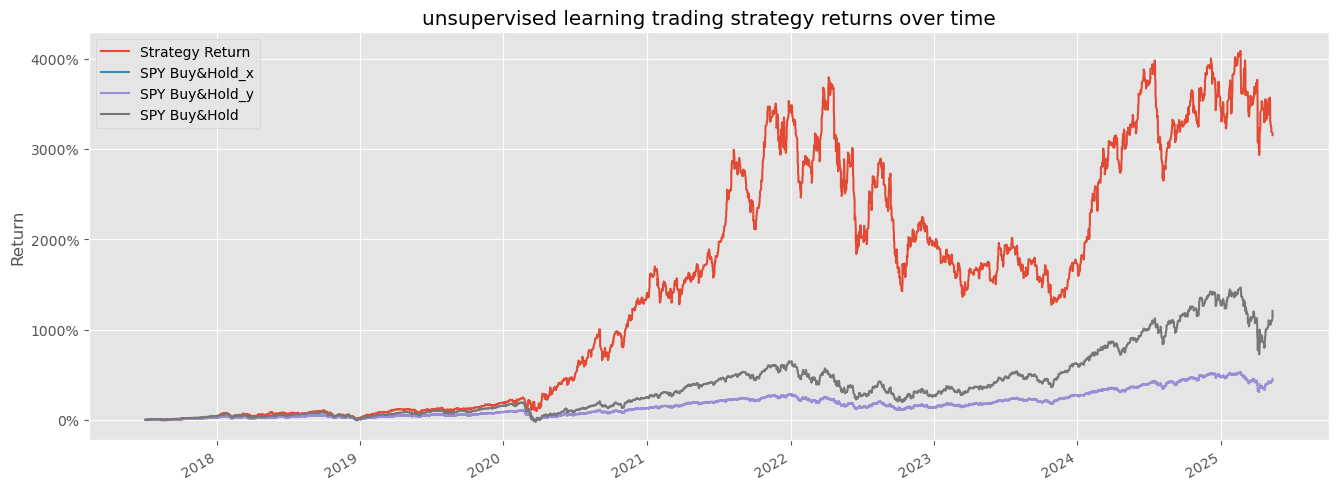

In [ ]:
import matplotlib.ticker as mtick
plt.style.use('ggplot')
portfolio_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum())-1
portfolio_cumulative_return[:'2025-05-12'].plot(figsize=(16,6))
plt.title('unsupervised learning trading strategy returns over time')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.ylabel('Return')
plt.show()

In [85]:
temp_df

Empty DataFrame
Columns: []
Index: []